<a href="https://colab.research.google.com/github/SicilianoBartolomeo/Human-activity-recognition/blob/main/KaggleDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from operator import imod
import pandas as pd
import numpy as np
import tensorflow as tf
import keras as krs
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, Conv1D, Bidirectional, LSTM
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import seaborn
from sklearn.model_selection import train_test_split
from keras import backend as K
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [ ]:
import random
seed=42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
from datetime import datetime


experiment_time = datetime.now().isoformat()
folder_name = str(experiment_time).replace(":","_")[0:19]
folder_name

configuration_file_name = 'configuration.txt'

In [ ]:
dataset_path = 'DatasetUniba.csv'
columns_names = ['user_id', 'activity', 'timestamp', 'x_axis', 'y_axis', 'z_axis']

In [ ]:
X_column_names = ['x_axis','y_axis','z_axis']
y_column_name = 'activity'

In [ ]:
classes_to_consider = ['lying','sitting','standing','walking','ironing']

In [ ]:
classes_to_consider = ['lying','sitting','standing','walking','running',
     'cycling','NordicWalking', 'ascendingStairs', 'descendingStairs',
    'vacuumCleaning','ironing','houseCleaning','ropeJumping']

In [ ]:
classes_to_consider = ['lying','sitting','standing','walking','running',
     'cycling','NordicWalking', 'ascendingStairs', 'descendingStairs',
    'vacuumCleaning','ironing']

In [ ]:
classes_to_rename = {
     1:'lying',
     2:'sitting',
     3:'standing',
     4:'walking',
     5:'running',
     6: 'cycling',
     7:'NordicWalking',
     9: 'watchingTV',
     10: 'computerWork',
     11: 'carDriving',
    12: 'ascendingStairs',
    13: 'descendingStairs',
    16:'vacuumCleaning',
    17:'ironing',
    18:'foldingLaundry',
    19:'houseCleaning',
    20:'playingSoccer',
    24:'ropeJumping',
    0:'other'
}

In [ ]:
classes_to_consider = ['StandingStill','SittingAndRelaxing',
     'LyingDown', 'Walking','ClimbingStairs', 'WaistBendsForward',
     'FrontalElevationOfArms','KneesBending','Cycling',
     'Jogging','Running','JumpFrontBack']

In [ ]:
classes_to_rename = {
     1: 'StandingStill',
     2: 'SittingAndRelaxing',
     3: 'LyingDown',
     4: 'Walking',
     5: 'ClimbingStairs',
     6: 'WaistBendsForward',
     7: 'FrontalElevationOfArms',
     8: 'KneesBending',
     9: 'Cycling',
     10: 'Jogging',
     11: 'Running',
     12: 'JumpFrontBack',
     0: 'null'
}

In [ ]:
time_steps_list = [600]
step_list =  [100]
use_magnitude = False
aggregate_falls = True
use_speed=True
use_total_speed=False
use_timestamp=False
use_squared_components=True
use_squared_speed=True
use_sign_speed=False
use_position=False

In [ ]:
leave_one_subject_out = True
stratified_test_set = False
leave_one_subject_out_with_validation_users = False
bilstm_one_subject_out = True

use_stats_in_cnn=False

In [ ]:
save_features = False

In [ ]:
batchsize = 512

In [ ]:
from os import mkdir
mkdir(folder_name)

In [ ]:
config_file = open(folder_name + "/" + configuration_file_name,"a")
config_file.write("dataset: " + dataset_path +
"time_steps_list: " + str(time_steps_list) + 
"\nstep_list:" + str(step_list)+
"\nuse_magnitude: "+str(use_magnitude)+
"\naggregate_falls: "+str(aggregate_falls)+
"\nuse_speed: "+str(use_speed)+
"\nuse_total_speed: "+str(use_total_speed)+
"\nuse_timestamp: "+str(use_timestamp)+
"\nuse_squared_components: "+str(use_squared_components)+
"\nuse_squared_speed: "+str(use_squared_speed)+
"\nuse_sign_speed: "+str(use_sign_speed)+
"\nuse_position: "+str(use_position)
)
config_file.close()

# New dataset

In [ ]:
import os
import pandas as pd
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip
!unzip MHEALTHDATASET.zip

--2022-12-02 14:59:11--  http://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75567983 (72M) [application/x-httpd-php]
Saving to: ‘MHEALTHDATASET.zip’

MHEALTHDATASET.zip  100%[===================>]  72.07M  18.0MB/s    in 5.2s    

2022-12-02 14:59:17 (14.0 MB/s) - ‘MHEALTHDATASET.zip’ saved [75567983/75567983]

Archive:  MHEALTHDATASET.zip
   creating: MHEALTHDATASET/
  inflating: MHEALTHDATASET/mHealth_subject1.log  
  inflating: MHEALTHDATASET/mHealth_subject10.log  
  inflating: MHEALTHDATASET/mHealth_subject2.log  
  inflating: MHEALTHDATASET/mHealth_subject3.log  
  inflating: MHEALTHDATASET/mHealth_subject4.log  
  inflating: MHEALTHDATASET/mHealth_subject5.log  
  inflating: MHEALTHDATASET/mHealth_subject6.log  
  inflating: MHEALTHDATASE

In [ ]:
!cat MHEALTHDATASET/README.txt


*************************************************** mHealth dataset **********************************************************

Authors: Oresti Ba�os, Rafael Garcia, Alejandro Saez
Date: 22/10/2013
Institution: University of Granada (UGR) 
Department: Department of Computer Architecture and Computer Technology.
Contact: oresti@ugr.es (oresti.bl@gmail.com)

---------------------------------------------------------------------------------------------------------------------------------------------
NOTE: if you use this dataset please cite the following work

Banos, O., Garcia, R., Holgado-Terriza, J.A., Damas, M., Pomares, H., Rojas, I., Saez, A., Villalonga, C.: 
mHealthDroid: a novel framework for agile development of mobile health applications. 
In: Proceedings of the 6th International Work-conference on Ambient Assisted Living an Active Ageing (IWAAL 2014), Belfast, United Kingdom, December 2-5 (2014)

Insightful figures and descriptions are presented within this work.
-------------

In [ ]:
for i in os.listdir('MHEALTHDATASET/'):
  if i not in ('README.txt'):
    print(i)

mHealth_subject6.log
mHealth_subject2.log
mHealth_subject5.log
mHealth_subject9.log
mHealth_subject1.log
mHealth_subject10.log
mHealth_subject3.log
mHealth_subject4.log
mHealth_subject8.log
mHealth_subject7.log


In [76]:
df = pd.DataFrame()
#loop to combine all data
for i in range(1,11):
    df1 = pd.read_csv(f'MHEALTHDATASET/mHealth_subject{i}.log', header=None, sep='\t')
    df1 = df1.loc[:, [14,15,16,23]]
    df1 = df1.rename(columns={
         14:"x_axis",15:"y_axis", 16:"z_axis", 23:"activity"
        })
    df1['user_id'] = i
    df = pd.concat([df,df1])

In [77]:
df = df.reset_index()
df['timestamp'] = df.index

In [ ]:
df = pd.DataFrame()
#loop to combine all data
for i in range(1,11):
    df1 = pd.read_csv(f'MHEALTHDATASET/mHealth_subject{i}.log', header=None, sep='\t')
    df1 = df1.loc[:, [5,6,7,8,9,10,14,15,16,17,18,19, 23]]
    df1 = df1.rename(columns={
        5:"alx", 6:"aly", 7:"alz", 8:"glx", 9:"gly", 10:"glz", 14:"arx",15:"ary", 16:"arz", 17:"grx", 18:"gry", 19:"grz", 23:"Activity"
        })
    df1['subject'] = 'subject'+str(i)
    df = pd.concat([df,df1])

In [78]:
df

,index,x_axis,y_axis,z_axis,activity,user_id,timestamp
0,0,-8.6499,-4.5781,0.187760,0,1,0
1,1,-8.6275,-4.3198,0.023595,0,1,1
2,2,-8.5055,-4.2772,0.275720,0,1,2
3,3,-8.6279,-4.3163,0.367520,0,1,3
4,4,-8.7008,-4.1459,0.407290,0,1,4
...,...,...,...,...,...,...,...
1215740,98299,-3.7198,-8.9071,0.294230,0,10,1215740
1215741,98300,-3.7160,-8.7455,0.448140,0,10,1215741
1215742,98301,-3.8824,-9.1155,0.450480,0,10,1215742
1215743,98302,-3.5564,-9.1441,0.594880,0,10,1215743


# Caricamento dati

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd gdrive/MyDrive
%ls

/content/gdrive/MyDrive
'Colab Notebooks'/   garbage_dataset/   Protocol/


In [ ]:
def load(dataset_path,id):
  columns=[]
  for i in range(54):
    columns.append(str(i))
  columns
  df = pd.read_csv(dataset_path, names=columns, delim_whitespace=True)
  df=df[['0','1','4','5','6']]
  df = df.rename({'0': 'timestamp', '1': 'activity', '4': 'x_axis',
                 '5': 'y_axis', '6': 'z_axis'}, axis=1) 
  df.insert(0, "user_id", id, True)
  return df

In [ ]:
#dataset_path = '/content/Dataset/subject10'
dataset_path = '/content/gdrive/MyDrive/Protocol/subject10'
path = []
num_user = 9

for i in range(num_user):
  if i != 0 and i!=3:
    path.append(dataset_path + str(i) + '.dat')

In [ ]:
#load data subject by subject
column_names = ['user_id','timestamp', 'activity', 'x_axis','y_axis', 'z_axis']
df = pd.DataFrame(columns=column_names)
i=1
for x in path:
  #pd.concat(df, load(x,i))
  df = pd.concat([df, load(x,i)], ignore_index=True)
  i+=1


In [ ]:
df = df.dropna()

In [79]:
df.isnull().sum()

index        0
x_axis       0
y_axis       0
z_axis       0
activity     0
user_id      0
timestamp    0
dtype: int64

In [80]:
df.head(10)

,index,x_axis,y_axis,z_axis,activity,user_id,timestamp
0,0,-8.6499,-4.5781,0.187760,0,1,0
1,1,-8.6275,-4.3198,0.023595,0,1,1
2,2,-8.5055,-4.2772,0.275720,0,1,2
3,3,-8.6279,-4.3163,0.367520,0,1,3
4,4,-8.7008,-4.1459,0.407290,0,1,4
5,5,-8.7247,-4.0449,0.506090,0,1,5
6,6,-9.0864,-4.1474,0.261380,0,1,6
7,7,-9.0143,-4.0052,0.476820,0,1,7
8,8,-9.0469,-4.0475,0.245540,0,1,8
9,9,-8.8318,-4.1090,0.096632,0,1,9


In [81]:
df.sample(10)

,index,x_axis,y_axis,z_axis,activity,user_id,timestamp
926544,73295,-5.70670,-5.2337,6.63420,0,8,926544
753000,4199,-1.40850,-9.7480,2.20010,0,7,753000
98855,98855,-2.98020,13.4390,-0.14057,11,1,98855
1008700,26427,-3.94550,-9.1444,0.56362,0,9,1008700
1083490,101217,0.79631,-8.0486,2.13920,0,9,1083490
644186,113497,-3.56540,-8.9617,1.83320,5,5,644186
353738,61897,0.87825,-13.7340,2.63620,0,3,353738
1201667,84226,0.18017,8.2458,-0.42104,11,10,1201667
395419,103578,0.25854,-5.0361,5.39400,0,3,395419
942103,88854,-8.11770,-5.6586,-2.85580,0,8,942103


In [ ]:
df.describe()

,user_id,timestamp,x_axis,y_axis,z_axis
count,970352.000000,970352.000000,970352.000000,970352.000000,970352.000000
mean,9.652475,7486.316867,0.406984,-0.656867,-0.275370
std,5.530966,4343.144385,4.259469,7.203429,4.695829
min,1.000000,0.000000,-56.221443,-61.331863,-58.738260
25%,5.000000,3730.000000,-2.204359,-3.413708,-3.185539
50%,9.000000,7460.000000,0.432485,-0.275161,-0.170318
75%,14.000000,11220.000000,2.824348,1.845646,1.931052
max,19.000000,15115.000000,57.871265,61.735350,52.757180


In [82]:
df['activity']=df['activity'].apply(lambda x: classes_to_rename[x] if x in classes_to_rename.keys() else x)

In [83]:
df = df[df['activity'].isin(classes_to_consider)]
df.reset_index(drop=True, inplace=True)

In [84]:
df['activity'].unique()

array(['StandingStill', 'SittingAndRelaxing', 'LyingDown', 'Walking',
       'WaistBendsForward', 'FrontalElevationOfArms', 'KneesBending',
       'Cycling', 'Jogging', 'Running', 'JumpFrontBack', 'ClimbingStairs'],
      dtype=object)

In [ ]:
df['activity'].unique()

array(['lying', 'sitting', 'standing', 'walking'], dtype=object)

In [ ]:
df.sample(10)

,x_axis,y_axis,z_axis,activity,user_id
328612,0.34634,5.725500,6.54670,FrontalElevationOfArms,10
318892,-9.70570,0.031787,0.17867,LyingDown,10
26375,-2.36380,-3.041900,-1.19380,Jogging,1
194826,2.17690,-1.713300,6.67480,Cycling,6
63355,-21.28300,-18.687000,5.33650,Jogging,2
105368,-0.85599,-8.908300,2.16920,ClimbingStairs,3
135547,0.22697,-7.018900,-0.89261,Jogging,4
54029,-3.38010,-8.608000,6.20500,FrontalElevationOfArms,2
312144,-2.55720,-7.495900,-2.59350,ClimbingStairs,10
265028,-3.13230,-6.155400,5.46310,Cycling,8


In [ ]:
import math

if use_magnitude:
    df['magnitude'] = np.sqrt(np.power(df['x_axis'],2) + np.power(df['y_axis'],2) + np.power(df['z_axis'],2))
    X_column_names.append('magnitude')
df.sample(10)

,user_id,activity,timestamp,x_axis,y_axis,z_axis
80287,2,Walking,4560,-0.299662,-10.027537,0.869551
244360,6,Hopping,8665,-1.436161,0.074990,0.506077
68534,2,Jogging,1290,0.512122,-19.916449,1.170201
569240,15,Hopping,2560,1.413376,7.428269,0.282830
478365,12,Walking,1170,0.966936,7.791567,0.030316
428576,11,Hopping,8795,0.356096,-6.497741,-3.009370
572455,15,Hopping,3605,-4.072380,7.862972,0.074416
569350,15,Hopping,3110,-1.546647,0.218972,-0.908295
658129,17,Sitting,9390,0.297272,2.086763,-7.592010
97757,3,Fall,5275,-5.380082,-0.002115,5.534460


In [85]:
classes = df['activity'].unique()
classes

array(['StandingStill', 'SittingAndRelaxing', 'LyingDown', 'Walking',
       'WaistBendsForward', 'FrontalElevationOfArms', 'KneesBending',
       'Cycling', 'Jogging', 'Running', 'JumpFrontBack', 'ClimbingStairs'],
      dtype=object)

In [ ]:
classes = df['activity'].unique()
classes

array(['lying', 'sitting', 'standing', 'walking'], dtype=object)

In [86]:
if use_speed:
    records = []

    for index, row in df.iterrows():
        record = dict()
        if index==0 or (row['activity'])!=(df.iloc[index-1]['activity']):
            record['id']=index
            record['timestamp']=row['timestamp']
            record['v_x']=0
            record['v_y']=0
            record['v_z']=0
            record['x']=0
            record['y']=0
            record['z']=0
            record['v']=0
        else:
            prev_row = df.iloc[index-1]
            prev_record = records[-1]
            delta_t=(float(row['timestamp'])-float(prev_row['timestamp']))/1000
            record['id']=index
            record['timestamp']=row['timestamp']
            vx=float(prev_record['v_x'])+float(prev_row['x_axis'])*delta_t
            vy=float(prev_record['v_y'])+float(prev_row['y_axis'])*delta_t
            vz=float(prev_record['v_z'])+float(prev_row['z_axis'])*delta_t
            record['v_x']=vx
            record['v_y']=vy
            record['v_z']=vz
            x = float(prev_record['x']) + float(prev_record['v_x'])*delta_t + 0.5*float(prev_row['x_axis'])*(delta_t*delta_t)
            y = float(prev_record['x']) + float(prev_record['v_y'])*delta_t + 0.5*float(prev_row['y_axis'])*(delta_t*delta_t)
            z = float(prev_record['x']) + float(prev_record['v_z'])*delta_t + 0.5*float(prev_row['z_axis'])*(delta_t*delta_t)
            record['x']=x
            record['y']=y
            record['z']=z
            record['v']=np.sqrt(np.power(vx,2) + np.power(vy,2) + np.power(vz,2))
        records.append(record)

    df_velocità = pd.DataFrame(records, columns=['id','v_x','v_y','v_z','v','x','y','z'])
    df = pd.concat([df, df_velocità], axis=1).drop(columns=['id'])
    X_column_names+=['v_x','v_y','v_z','v']
    if not use_total_speed:
        X_column_names.remove('v')
    if use_position:
        X_column_names+=['x','y','z']
    df_velocità.head()

In [ ]:
df.head()

,user_id,timestamp,activity,x_axis,y_axis,z_axis,v_x,v_y,v_z,v,x,y,z
0,1,37.66,lying,2.21530,8.27915,5.58753,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1,37.67,lying,2.29196,7.67288,5.74467,0.000022,0.000083,0.000056,0.000102,1.107650e-10,4.139575e-10,2.793765e-10
2,1,37.68,lying,2.29090,7.14240,5.82342,0.000045,0.000160,0.000113,0.000201,4.468930e-10,1.322324e-09,9.567515e-10
3,1,37.69,lying,2.21800,7.14365,5.89930,0.000068,0.000231,0.000172,0.000296,1.012164e-09,2.399216e-09,1.871284e-09
4,1,37.70,lying,2.30106,7.25857,6.09259,0.000090,0.000302,0.000231,0.000391,1.802880e-09,3.678790e-09,3.022691e-09


In [87]:
if use_squared_components:
    df['x_axis_squared'] = np.square(df['x_axis'])
    df['y_axis_squared'] = np.square(df['y_axis'])
    df['z_axis_squared'] = np.square(df['z_axis'])
    X_column_names+=['x_axis_squared', 'y_axis_squared','z_axis_squared']

if use_squared_speed:
    df['vx2'] = np.square(df['v_x'])
    df['vy2'] = np.square(df['v_y'])
    df['vz2'] = np.square(df['v_z'])
    X_column_names+=['vx2','vy2','vz2']

if use_sign_speed:
    df['signvx']= np.sign(df['v_x'])  #df['v_x']/(np.abs(df['v_x'])+1)
    df['signvy']= np.sign(df['v_y'])  #df['v_y']/(np.abs(df['v_y'])+1)
    df['signvz']= np.sign(df['v_z'])  #df['v_z']/(np.abs(df['v_z'])+1)
    X_column_names+=['signvx','signvy','signvz']

In [88]:
users_ids = df['user_id'].unique()
users_number = len(users_ids)
print("Numero totale di utenti:",users_number)

Numero totale di utenti: 10


In [ ]:
users_ids = df['user_id'].unique()
users_number = len(users_ids)
print("Numero totale di utenti:",users_number)

Numero totale di utenti: 8


In [89]:
user_original_data = dict() #dict {user_id: dataframe_dati_utente_originali}
for users_id in users_ids:
    user_original_data[users_id]=df[df['user_id']==users_id]

In [90]:
user_original_data.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [91]:
user_original_data[1]

,index,x_axis,y_axis,z_axis,activity,user_id,timestamp,v_x,v_y,v_z,v,x,y,z,x_axis_squared,y_axis_squared,z_axis_squared,vx2,vy2,vz2
0,6656,-2.8439,-9.0618,1.81770,StandingStill,1,6656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.087767,82.116219,3.304033,0.000000,0.000000,0.000000
1,6657,-2.9935,-9.2048,1.51890,StandingStill,1,6657,-0.002844,-0.009062,0.001818,0.009670,-0.000001,-0.000005,9.088500e-07,8.961042,84.728343,2.307057,0.000008,0.000082,0.000003
2,6658,-2.8846,-9.1945,1.55070,StandingStill,1,6658,-0.005837,-0.018267,0.003337,0.019465,-0.000006,-0.000015,1.155200e-06,8.320917,84.538830,2.404670,0.000034,0.000334,0.000011
3,6659,-2.9245,-9.1746,1.54130,StandingStill,1,6659,-0.008722,-0.027461,0.004887,0.029224,-0.000013,-0.000029,-1.650650e-06,8.552700,84.173285,2.375606,0.000076,0.000754,0.000024
4,6660,-2.8963,-9.2039,1.61270,StandingStill,1,6660,-0.011647,-0.036636,0.006429,0.038976,-0.000023,-0.000045,-7.384350e-06,8.388554,84.711775,2.600801,0.000136,0.001342,0.000041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35169,160251,-2.3478,-9.4027,-1.27220,ClimbingStairs,1,160251,-10.748260,-27.278822,1.900132,29.381452,-16.126252,-16.142779,-1.611360e+01,5.512165,88.410767,1.618493,115.525099,744.134120,3.610503
35170,160252,-1.9978,-9.4592,-0.92088,ClimbingStairs,1,160252,-10.750608,-27.288225,1.898860,29.390958,-16.137001,-16.153535,-1.612435e+01,3.991205,89.476465,0.848020,115.575575,744.647197,3.605670
35171,160253,-1.9755,-8.8985,-0.85118,ClimbingStairs,1,160253,-10.752606,-27.297684,1.897939,29.400412,-16.147753,-16.164294,-1.613510e+01,3.902600,79.183302,0.724507,115.618534,745.163536,3.602173
35172,160254,-2.2332,-8.8793,-0.93355,ClimbingStairs,1,160254,-10.754581,-27.306582,1.897088,29.409342,-16.158506,-16.175055,-1.614586e+01,4.987182,78.841968,0.871516,115.661021,745.649432,3.598943


In [ ]:
from scipy import stats
def create_sliding_windows(data, time_steps=1, step=1):
  Xs = []
  for i in range(0, len(data) - time_steps, step):
    v = data.iloc[i: (i+time_steps)]
    

    Xs.append(v)
    
  return Xs

In [92]:
user_trials = dict() #dict {user id: lista di trial dell'utente}

for users_id in users_ids:
    original_data = user_original_data[users_id]
    original_data.reset_index(inplace=True)
    #troviamo gli indici dei record iniziale di ogni trial (timestamp=0)
    index_start_trial = [0]
    for index, row in original_data.iterrows():
        if index==0:
            continue
        #if int(row['activity'])!=int(original_data.iloc[index-1]['activity']):
        if (row['activity'])!=(original_data.iloc[index-1]['activity']):
           # print("ok")
            index_start_trial.append(index)
    trials = []
    for i in range(len(index_start_trial)-1):
        trials.append(original_data.iloc[index_start_trial[i]:index_start_trial[i+1]-1])
    trials.append(original_data.iloc[index_start_trial[len(index_start_trial)-1]:])
    user_trials[users_id]=trials

In [93]:
user_trials[3][2]

,level_0,index,x_axis,y_axis,z_axis,activity,user_id,timestamp,v_x,v_y,...,v,x,y,z,x_axis_squared,y_axis_squared,z_axis_squared,vx2,vy2,vz2
6144,76850,16384,-3.9965,4.5835,8.3542,LyingDown,3,308225,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,15.972012,21.008472,69.792658,0.000000,0.000000,0.000000
6145,76851,16385,-4.1338,4.6524,8.2430,LyingDown,3,308226,-0.003997,0.004583,...,0.010333,-0.000002,0.000002,0.000004,17.088302,21.644826,67.947049,0.000016,0.000021,0.000070
6146,76852,16386,-3.6495,4.6610,8.0976,LyingDown,3,308227,-0.008130,0.009236,...,0.020661,-0.000008,0.000005,0.000010,13.318850,21.724921,65.571126,0.000066,0.000085,0.000275
6147,76853,16387,-3.2419,4.7016,8.1622,LyingDown,3,308228,-0.011780,0.013897,...,0.030687,-0.000018,0.000004,0.000013,10.509916,22.105043,66.621509,0.000139,0.000193,0.000610
6148,76854,16388,-3.2217,4.7912,8.1250,LyingDown,3,308229,-0.015022,0.018599,...,0.040634,-0.000031,-0.000002,0.000011,10.379351,22.955597,66.015625,0.000226,0.000346,0.001080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9210,79916,19450,-3.0977,4.2550,7.5044,LyingDown,3,311291,-11.021556,14.256687,...,30.318269,-16.796229,-16.770954,-16.760831,9.595745,18.105025,56.316019,121.474701,203.253133,594.469577
9211,79917,19451,-3.3450,4.5365,7.6539,LyingDown,3,311292,-11.024654,14.260942,...,30.327431,-16.807252,-16.781970,-16.771843,11.189025,20.579832,58.582185,121.542994,203.374475,594.835574
9212,79918,19452,-3.3622,4.7283,7.8302,LyingDown,3,311293,-11.027999,14.265479,...,30.336935,-16.818278,-16.792989,-16.782859,11.304389,22.356821,61.312032,121.616760,203.503885,595.208978
9213,79919,19453,-3.3038,4.7288,7.8823,LyingDown,3,311294,-11.031361,14.270207,...,30.346678,-16.829308,-16.804011,-16.793878,10.915094,22.361549,62.130653,121.690928,203.638811,595.591105


In [ ]:
user_trials[1][4]

,index,user_id,activity,timestamp,x_axis,y_axis,z_axis,v_x,v_y,v_z,v,x,y,z,x_axis_squared,y_axis_squared,z_axis_squared,vx2,vy2,vz2
12084,12084,1,Hopping,0,0.588376,-12.244653,-3.510972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.346186,149.931527,12.326926,0.000000,0.000000,0.000000
12085,12085,1,Hopping,5,1.688943,-12.206215,-2.763705,0.002942,-0.061223,-0.017555,0.063758,0.000007,-0.000153,-0.000044,2.852527,148.991685,7.638068,0.000009,0.003748,0.000308
12086,12086,1,Hopping,10,2.506947,-11.873831,-1.915576,0.011387,-0.122254,-0.031373,0.126728,0.000043,-0.000451,-0.000115,6.284786,140.987863,3.669431,0.000130,0.014946,0.000984
12087,12087,1,Hopping,15,2.959034,-11.462978,-1.201675,0.023921,-0.181623,-0.040951,0.187713,0.000131,-0.000717,-0.000138,8.755883,131.399865,1.444022,0.000572,0.032987,0.001677
12088,12088,1,Hopping,20,2.914835,-11.029402,-0.691599,0.038717,-0.238938,-0.046960,0.246568,0.000288,-0.000920,-0.000088,8.496264,121.647708,0.478309,0.001499,0.057092,0.002205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15079,15079,1,Hopping,14975,2.127361,-11.436087,-2.435742,-3.538412,-118.765564,-10.719030,119.300784,-26.787007,-27.362944,-26.822841,4.525665,130.784086,5.932839,12.520362,14105.259085,114.897597
15080,15080,1,Hopping,14980,1.024550,-10.493032,-2.617908,-3.527776,-118.822744,-10.731208,119.358487,-26.804673,-27.380978,-26.840633,1.049702,110.103710,6.853443,12.445200,14118.844488,115.158833
15081,15081,1,Hopping,14985,-0.181768,-9.692158,-2.784552,-3.522653,-118.875209,-10.744298,119.411743,-26.822299,-27.398918,-26.858362,0.033040,93.937927,7.753732,12.409083,14131.315348,115.439938
15082,15082,1,Hopping,14990,-1.502831,-9.059606,-2.907250,-3.523562,-118.923670,-10.758221,119.461266,-26.839915,-27.416796,-26.876055,2.258501,82.076461,8.452105,12.415486,14142.839270,115.739312


In [94]:
sliding_w_by_timestep=dict() #[timestep][steps][userid][indice trial][indice sliding window]

for time_steps in time_steps_list:
    sliding_w_by_step=dict()
    for step in step_list:
        user_sliding_windows = dict()  #[userid][indice trial][indice sliding window]
        for user_id in users_ids:
            user_trial_list = user_trials[user_id]
            num_trials = len(user_trial_list)  
            list_sliding_windows = []  
            for i in range(num_trials):
                trial = user_trial_list[i]
                sliding_window = create_sliding_windows(trial, time_steps, step)
                list_sliding_windows.append(sliding_window)
            user_sliding_windows[user_id]=list_sliding_windows    
        sliding_w_by_step[step]=user_sliding_windows
    sliding_w_by_timestep[time_steps]=sliding_w_by_step  

In [ ]:
trial

,index,x_axis,y_axis,z_axis,activity,user_id
32666,342171,-1.48750,-0.38290,-0.289980,JumpFrontBack,10
32667,342172,-1.67190,-0.78675,0.325250,JumpFrontBack,10
32668,342173,-0.49839,-1.52550,0.454980,JumpFrontBack,10
32669,342174,0.32067,-2.25940,0.064115,JumpFrontBack,10
32670,342175,-0.50649,-1.41980,1.022800,JumpFrontBack,10
...,...,...,...,...,...,...
33685,343190,-8.23480,-4.96520,2.480900,JumpFrontBack,10
33686,343191,-21.31800,-10.21300,3.656000,JumpFrontBack,10
33687,343192,-21.29700,-18.70500,4.460600,JumpFrontBack,10
33688,343193,-21.13800,-18.69800,1.158800,JumpFrontBack,10


In [ ]:
#esempio di trial
trial

,index,user_id,activity,timestamp,x_axis,y_axis,z_axis,v_x,v_y,v_z,v,x,y,z,x_axis_squared,y_axis_squared,z_axis_squared,vx2,vy2,vz2
33198,734724,19,Walking,0,3.905989,4.920188,3.792791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.256748,24.208250,14.385264,0.000000,0.000000,0.000000
33199,734725,19,Walking,5,3.712691,4.402665,1.453277,0.019530,0.024601,0.018964,0.036691,0.000049,0.000062,0.000047,13.784073,19.383459,2.112013,0.000381,0.000605,0.000360
33200,734726,19,Walking,10,3.388979,3.884667,-1.575216,0.038093,0.046614,0.026230,0.065666,0.000193,0.000227,0.000162,11.485179,15.090638,2.481306,0.001451,0.002173,0.000688
33201,734727,19,Walking,15,2.971400,3.394894,-3.453373,0.055038,0.066038,0.018354,0.087904,0.000426,0.000475,0.000304,8.829217,11.525303,11.925788,0.003029,0.004361,0.000337
33202,734728,19,Walking,20,2.431605,3.106119,-4.544110,0.069895,0.083012,0.001087,0.108524,0.000738,0.000798,0.000474,5.912702,9.647973,20.648938,0.004885,0.006891,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36204,737730,19,Walking,15030,3.607614,3.775315,-1.813403,17.134446,114.826340,5.423988,116.224341,131.738458,132.226920,131.679968,13.014877,14.253006,3.288430,293.589236,13185.088461,29.419648
36205,737731,19,Walking,15035,3.749106,4.399148,-2.120795,17.152484,114.845217,5.414921,116.245228,131.824176,132.312637,131.765556,14.055792,19.352508,4.497772,294.207706,13189.423874,29.321371
36206,737732,19,Walking,15040,3.862242,5.141159,-2.582244,17.171229,114.867213,5.404317,116.269232,131.909985,132.398457,131.851224,14.916911,26.431521,6.667985,294.851122,13194.476569,29.206644
36207,737733,19,Walking,15045,3.913796,6.209425,-3.008182,17.190541,114.892919,5.391406,116.296882,131.995889,132.484385,131.936974,15.317799,38.556964,9.049159,295.514690,13200.382737,29.067258


In [95]:
sliding_w_by_timestep[time_steps_list[0]][step_list[0]][1][0][0]

,level_0,index,x_axis,y_axis,z_axis,activity,user_id,timestamp,v_x,v_y,...,v,x,y,z,x_axis_squared,y_axis_squared,z_axis_squared,vx2,vy2,vz2
0,0,6656,-2.8439,-9.0618,1.8177,StandingStill,1,6656,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,8.087767,82.116219,3.304033,0.000000,0.000000,0.000000
1,1,6657,-2.9935,-9.2048,1.5189,StandingStill,1,6657,-0.002844,-0.009062,...,0.009670,-0.000001,-0.000005,9.088500e-07,8.961042,84.728343,2.307057,0.000008,0.000082,0.000003
2,2,6658,-2.8846,-9.1945,1.5507,StandingStill,1,6658,-0.005837,-0.018267,...,0.019465,-0.000006,-0.000015,1.155200e-06,8.320917,84.538830,2.404670,0.000034,0.000334,0.000011
3,3,6659,-2.9245,-9.1746,1.5413,StandingStill,1,6659,-0.008722,-0.027461,...,0.029224,-0.000013,-0.000029,-1.650650e-06,8.552700,84.173285,2.375606,0.000076,0.000754,0.000024
4,4,6660,-2.8963,-9.2039,1.6127,StandingStill,1,6660,-0.011647,-0.036636,...,0.038976,-0.000023,-0.000045,-7.384350e-06,8.388554,84.711775,2.600801,0.000136,0.001342,0.000041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,7251,-2.9564,-8.9846,1.5404,StandingStill,1,7251,-1.733379,-5.436579,...,5.795992,-0.511867,-0.515567,-5.091199e-01,8.740301,80.723037,2.372832,3.004602,29.556387,1.032539
596,596,7252,-3.0286,-9.1732,1.6768,StandingStill,1,7252,-1.736335,-5.445563,...,5.805574,-0.513602,-0.517308,-5.108501e-01,9.172418,84.147598,2.811658,3.014860,29.654159,1.035672
597,597,7253,-3.0265,-9.1640,1.6043,StandingStill,1,7253,-1.739364,-5.454736,...,5.815378,-0.515340,-0.519052,-5.125833e-01,9.159702,83.978896,2.573778,3.025387,29.754149,1.039088
598,598,7254,-3.0468,-9.0044,1.5602,StandingStill,1,7254,-1.742390,-5.463900,...,5.825160,-0.517081,-0.520799,-5.143195e-01,9.282990,81.079219,2.434224,3.035924,29.854208,1.042361


In [ ]:
#esempio di sliding window
sliding_w_by_timestep[time_steps_list[0]][step_list[0]][1][0][0]

,index,user_id,activity,timestamp,x_axis,y_axis,z_axis,v_x,v_y,v_z,v,x,y,z,x_axis_squared,y_axis_squared,z_axis_squared,vx2,vy2,vz2
0,0,1,Fall,0,-2.120995,-7.684790,-0.116293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.498618,59.055997,0.013524,0.000000,0.000000,0.000000e+00
1,1,1,Fall,5,-1.837475,-7.524046,-0.273713,-0.010605,-0.038424,-0.000581,0.039865,-0.000027,-0.000096,-0.000001,3.376315,56.611268,0.074919,0.000112,0.001476,3.381020e-07
2,2,1,Fall,10,-1.528029,-7.397976,-0.263592,-0.019792,-0.076044,-0.001950,0.078602,-0.000103,-0.000313,-0.000033,2.334873,54.730049,0.069481,0.000392,0.005783,3.802614e-06
3,3,1,Fall,15,-1.099379,-7.245015,-0.243442,-0.027432,-0.113034,-0.003268,0.116361,-0.000221,-0.000575,-0.000116,1.208634,52.490242,0.059264,0.000753,0.012777,1.067976e-05
4,4,1,Fall,20,-0.651752,-7.112909,-0.147084,-0.032929,-0.149259,-0.004485,0.152914,-0.000371,-0.000876,-0.000240,0.424780,50.593479,0.021634,0.001084,0.022278,2.011704e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,1,Fall,2975,-2.325609,-0.509494,-6.871175,-5.930715,-2.537528,-12.896842,14.420158,-6.124823,-6.107881,-6.159599,5.408456,0.259584,47.213046,35.173386,6.439046,1.663285e+02
596,596,1,Fall,2980,-2.291714,-0.552084,-6.960178,-5.942344,-2.540075,-12.931197,14.456116,-6.154505,-6.137517,-6.189393,5.251955,0.304796,48.444083,35.311447,6.451981,1.672159e+02
597,597,1,Fall,2985,-2.234422,-0.602634,-7.031116,-5.953802,-2.542835,-12.965998,14.492442,-6.184246,-6.167212,-6.219248,4.992643,0.363168,49.436585,35.447759,6.466012,1.681171e+02
598,598,1,Fall,2990,-2.195272,-0.619144,-7.144061,-5.964974,-2.545849,-13.001154,14.529015,-6.214042,-6.196967,-6.249163,4.819220,0.383340,51.037602,35.580917,6.481345,1.690300e+02


In [96]:
df_aggregate_feature_by_timestep = dict()
axes = ['x_axis','y_axis','z_axis']

for time_steps in time_steps_list:
    df_aggregate_feature_by_step = dict()
    for step in step_list:
        df_aggregate_feature_by_user = []
        for user_id in users_ids:
            df_aggregate_feature_by_trial=dict()
            for trial in range(len(sliding_w_by_timestep[time_steps][step][user_id])):
                df_aggregate_feature_by_sliding_window = dict()
                for sliding_window in range(len(sliding_w_by_timestep[time_steps][step][user_id][trial])):
                    tupla = dict()
                    tupla['time_steps']=time_steps
                    tupla['step']=step
                    tupla['user_id']=user_id
                    tupla['trial']=trial
                    tupla['sliding_window']=sliding_window
                    tupla['activity']=sliding_w_by_timestep[time_steps][step][user_id][trial][sliding_window]['activity'].unique()[0]
                    
                    for axis in axes:
                        tupla[f'{axis}_mean']=sliding_w_by_timestep[time_steps][step][user_id][trial][sliding_window][axis].mean()
                        tupla[f'{axis}_devstd']=sliding_w_by_timestep[time_steps][step][user_id][trial][sliding_window][axis].std()
                        tupla[f'{axis}_power']=sliding_w_by_timestep[time_steps][step][user_id][trial][sliding_window][axis].pow(2).mean()                   
                    
                    
                    for k1, v1 in sliding_w_by_timestep[time_steps][step][user_id][trial][sliding_window][axes].cov().to_dict().items():
                        for k2, v2 in v1.items():
                            tupla[f"cov({k1},{k2})"]=v2

                    df_aggregate_feature_by_user.append(tupla)
                    
                    #df_aggregate_feature_by_sliding_window[sliding_window]=tupla
                #df_aggregate_feature_by_trial[trial]=df_aggregate_feature_by_sliding_window
            #df_aggregate_feature_by_user[user_id]=df_aggregate_feature_by_trial
        df_aggregate_feature_by_step[step]=pd.DataFrame(df_aggregate_feature_by_user)
    df_aggregate_feature_by_timestep[time_steps]=df_aggregate_feature_by_step


In [97]:
df_aggregate_feature_by_timestep[time_steps_list[0]][step_list[0]]

,time_steps,step,user_id,trial,sliding_window,activity,x_axis_mean,x_axis_devstd,x_axis_power,y_axis_mean,...,z_axis_power,"cov(x_axis,x_axis)","cov(x_axis,y_axis)","cov(x_axis,z_axis)","cov(y_axis,x_axis)","cov(y_axis,y_axis)","cov(y_axis,z_axis)","cov(z_axis,x_axis)","cov(z_axis,y_axis)","cov(z_axis,z_axis)"
0,600,100,1,0,0,StandingStill,-2.913919,0.124591,8.506421,-9.137065,...,2.927027,0.015523,-0.002366,0.000483,-0.002366,0.010738,0.001293,0.000483,0.001293,0.013734
1,600,100,1,0,1,StandingStill,-2.934854,0.125581,8.629111,-9.131949,...,2.860133,0.015771,-0.002199,0.000220,-0.002199,0.010486,0.001547,0.000220,0.001547,0.014671
2,600,100,1,0,2,StandingStill,-2.956434,0.126773,8.756545,-9.129857,...,2.800738,0.016071,-0.001912,-0.000358,-0.001912,0.010785,0.002101,-0.000358,0.002101,0.013891
3,600,100,1,0,3,StandingStill,-2.969162,0.118665,8.829979,-9.132843,...,2.726334,0.014081,-0.001624,0.000299,-0.001624,0.010794,0.001464,0.000299,0.001464,0.012247
4,600,100,1,0,4,StandingStill,-2.997320,0.111062,8.996243,-9.129314,...,2.670609,0.012335,-0.000886,-0.000209,-0.000886,0.010501,0.001453,-0.000209,0.001453,0.012284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,600,100,10,11,0,JumpFrontBack,-6.635264,9.466314,133.488480,-4.512021,...,16.584951,89.611110,59.199037,-27.808903,59.199037,45.909004,-18.935020,-27.808903,-18.935020,12.690763
2751,600,100,10,11,1,JumpFrontBack,-6.476325,9.507916,132.192587,-4.143591,...,17.964854,90.400474,56.796421,-29.945796,56.796421,42.401329,-19.426219,-29.945796,-19.426219,13.922693
2752,600,100,10,11,2,JumpFrontBack,-6.393348,9.676111,134.345971,-4.154254,...,19.430631,93.627119,58.608675,-31.712160,58.608675,43.688705,-20.814367,-31.712160,-20.814367,15.110421
2753,600,100,10,11,3,JumpFrontBack,-6.129782,9.661786,130.768752,-3.921195,...,20.100687,93.350109,58.039478,-32.593311,58.039478,43.217231,-21.556425,-32.593311,-21.556425,15.770622


In [ ]:
df_aggregate_feature_by_timestep[time_steps_list[0]][step_list[0]]

,time_steps,step,user_id,trial,sliding_window,activity,x_axis_mean,x_axis_devstd,x_axis_power,y_axis_mean,...,z_axis_power,"cov(x_axis,x_axis)","cov(x_axis,y_axis)","cov(x_axis,z_axis)","cov(y_axis,x_axis)","cov(y_axis,y_axis)","cov(y_axis,z_axis)","cov(z_axis,x_axis)","cov(z_axis,y_axis)","cov(z_axis,z_axis)"
0,600,100,1,0,0,Fall,-1.995646,2.586167,10.659720,-0.850659,...,34.326067,6.688262,-11.273968,7.883962,-11.273968,48.027202,-11.912880,7.883962,-11.912880,15.362830
1,600,100,1,0,1,Fall,-2.506570,2.320661,11.659386,0.322977,...,42.615043,5.385467,-7.835804,6.440426,-7.835804,37.913874,-6.537518,6.440426,-6.537518,13.094506
2,600,100,1,0,2,Fall,-2.834991,2.154660,12.671999,1.210539,...,49.963273,4.642561,-5.478082,5.387755,-5.478082,30.079760,-2.515052,5.387755,-2.515052,11.709851
3,600,100,1,0,3,Fall,-2.681637,1.268671,8.798021,0.028316,...,48.912018,1.609527,0.448079,1.908640,0.448079,10.343486,3.942075,1.908640,3.942075,5.984117
4,600,100,1,0,4,Fall,-2.780770,0.637050,8.137838,-0.965211,...,55.097968,0.405833,0.181713,0.280007,0.181713,0.349389,0.280279,0.280007,0.280279,1.221111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6064,600,100,19,11,20,Walking,1.292207,3.456709,13.598721,7.433629,...,10.365817,11.948837,-12.156124,-3.774685,-12.156124,42.334281,0.577013,-3.774685,0.577013,10.344760
6065,600,100,19,11,21,Walking,1.014370,3.307303,11.948967,7.743142,...,8.668293,10.938251,-10.637709,-3.296705,-10.637709,35.119576,1.569864,-3.296705,1.569864,8.580417
6066,600,100,19,11,22,Walking,1.108906,3.723469,15.070783,7.590312,...,11.124517,13.864219,-10.310074,-4.555707,-10.310074,35.943224,1.771720,-4.555707,1.771720,11.067935
6067,600,100,19,11,23,Walking,1.058964,3.336957,12.238129,7.646630,...,8.024758,11.135283,-7.342637,-3.218866,-7.342637,24.065938,2.156671,-3.218866,2.156671,7.801633


In [98]:
import itertools

if save_features:
    for config in itertools.product(time_steps_list, step_list):
        time_step = config[0]
        step = config[1]
        
        example_list = []
        data = sliding_w_by_timestep[time_step][step]
        for user_id in users_ids:
            for trial in range(len(data[user_id])):
                for sliding_window in range(len(data[user_id][trial])):
                    for index, row in data[user_id][trial][sliding_window].iterrows():
                        item = row.to_dict()
                        item.update({'trial':trial,'sliding_window':sliding_window})
                        example_list.append(item)
        example_df = pd.DataFrame(example_list, columns=['trial','sliding_window']+list(sliding_w_by_timestep[time_step][step][users_ids[0]][0][0].columns))
        example_df.drop(columns="index", inplace=True)
        example_df.to_csv(f"{dataset_path.split('.')[0]}_{time_step}_{step}.csv")

In [99]:
tuple_by_timestep=dict()
for time_steps in time_steps_list:
    tuple_by_step=dict()
    for step in step_list:
        tuple = dict()

        for user_id in users_ids:
            Xs = []
            ys = []
            for trial in range(len(sliding_w_by_timestep[time_steps][step][user_id])):
                for sliding_window in range(len(sliding_w_by_timestep[time_steps][step][user_id][trial])):
                    Xs.append(np.array(sliding_w_by_timestep[time_steps][step][user_id][trial][sliding_window][X_column_names]))
                    ys.append(np.array(sliding_w_by_timestep[time_steps][step][user_id][trial][sliding_window][y_column_name].unique()))
            tuple[user_id]=(Xs,ys)
        tuple_by_step[step]=tuple
    tuple_by_timestep[time_steps]=tuple_by_step        

In [100]:
ignore_columns = ['time_steps', 'step', 'user_id', 'trial', 'activity', 'sliding_window']

tuple_by_timestep_with_stats=dict()
for time_steps in time_steps_list:
    tuple_by_step=dict()
    for step in step_list:
        tuple = dict()
        actual_df_stats = df_aggregate_feature_by_timestep[time_steps][step]
        feature_columns = [col_name for col_name in list(actual_df_stats.columns.values) if not col_name in ignore_columns]
        for user_id in users_ids:
            Xs = []
            ys = []
            for trial in range(len(sliding_w_by_timestep[time_steps][step][user_id])):
                for sliding_window in range(len(sliding_w_by_timestep[time_steps][step][user_id][trial])):
                    raw_and_feature = np.array(sliding_w_by_timestep[time_steps][step][user_id][trial][sliding_window][X_column_names]).flatten().reshape(-1,1)
                    actual_row_stats = actual_df_stats.loc[(actual_df_stats['time_steps']==time_steps) & (actual_df_stats['step']==step) & (actual_df_stats['user_id']==user_id) & (actual_df_stats['trial']==trial) &(actual_df_stats['sliding_window']==sliding_window)]
                    aggregate_feature = np.array(actual_row_stats[feature_columns]).reshape(-1,1)
                    #aggregate_feature = np.array(list(df_aggregate_feature_by_timestep[time_steps][step][user_id][trial][sliding_window].values())[2:]).reshape(-1,1)
                    Xs.append(np.concatenate((raw_and_feature,aggregate_feature),axis=0))
                    ys.append(np.array(sliding_w_by_timestep[time_steps][step][user_id][trial][sliding_window][y_column_name].unique()))
            tuple[user_id]=(Xs,ys)
        tuple_by_step[step]=tuple
    tuple_by_timestep_with_stats[time_steps]=tuple_by_step     

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives/ (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
    
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# CNN

In [ ]:
cnn_dir = folder_name + "\\cnn"
leave_one_subject_out_dir = "\\leave_one_subject_out"
leave_one_subject_out_with_validation_user_dir =  "\\leave_one_subject_out_with_validation_user"
stratified_dir = "\\stratified"
plot_dir = "\\plot"
result_filename = "\\result.csv"
config_filename = "\\config.txt"

mkdir(cnn_dir )


In [ ]:
def createCNN(input_size, output_size):
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape = input_size))
    model.add(Dropout(0.5))
    model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(output_size, activation='softmax'))
    model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy',f1_m])

    cnn_config_file = open(cnn_dir+config_filename, "a")
    model.summary(print_fn=lambda x: cnn_config_file.write(x))
    cnn_config_file.close()
    
    return model

In [102]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc = enc.fit(np.array(classes).reshape(-1,1))

In [101]:
import gc
gc.collect()

8

In [ ]:
if use_stats_in_cnn:
    data_cnn = tuple_by_timestep_with_stats
else:
    data_cnn = tuple_by_timestep

## CNN - Leave One Subject Out

[Errno 17] File exists: '2022-12-02T14_59_25\\cnn\\leave_one_subject_out'
600 100
Utente test:  1
Training: x-> 1977 y-> 1977
Validation: x-> 495 y-> 495
Testing: x-> 283 y-> 283
Total: x-> 2755 y-> 2755
Epoch 1/100
16/16 [==============================] - 1s 54ms/step - loss: 2.0205 - accuracy: 0.2413 - f1_m: 0.1725 - val_loss: 1.5922 - val_accuracy: 0.3434 - val_f1_m: 0.2708
Epoch 2/100
16/16 [==============================] - 1s 35ms/step - loss: 1.4378 - accuracy: 0.4340 - f1_m: 0.4179 - val_loss: 1.3741 - val_accuracy: 0.4101 - val_f1_m: 0.2765
Epoch 3/100
16/16 [==============================] - 1s 35ms/step - loss: 1.1669 - accuracy: 0.5276 - f1_m: 0.5015 - val_loss: 1.0501 - val_accuracy: 0.5778 - val_f1_m: 0.5093
Epoch 4/100
16/16 [==============================] - 1s 34ms/step - loss: 0.9828 - accuracy: 0.6141 - f1_m: 0.5855 - val_loss: 0.9278 - val_accuracy: 0.6424 - val_f1_m: 0.5803
Epoch 5/100
16/16 [==============================] - 1s 35ms/step - loss: 0.8626 - accuracy:

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


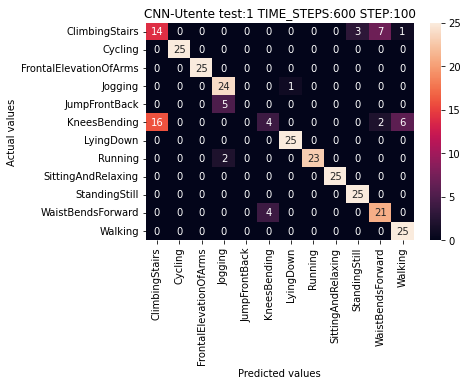

Utente test:  2
Training: x-> 1973 y-> 1973
Validation: x-> 494 y-> 494
Testing: x-> 288 y-> 288
Total: x-> 2755 y-> 2755
Epoch 1/100
16/16 [==============================] - 1s 54ms/step - loss: 2.2373 - accuracy: 0.2058 - f1_m: 0.1130 - val_loss: 1.8110 - val_accuracy: 0.3947 - val_f1_m: 0.0492
Epoch 2/100
16/16 [==============================] - 1s 34ms/step - loss: 1.5508 - accuracy: 0.4283 - f1_m: 0.3392 - val_loss: 1.2631 - val_accuracy: 0.4798 - val_f1_m: 0.3301
Epoch 3/100
16/16 [==============================] - 1s 36ms/step - loss: 1.2756 - accuracy: 0.5033 - f1_m: 0.4466 - val_loss: 1.1387 - val_accuracy: 0.5567 - val_f1_m: 0.5051
Epoch 4/100
16/16 [==============================] - 1s 34ms/step - loss: 1.1132 - accuracy: 0.5631 - f1_m: 0.5305 - val_loss: 1.0228 - val_accuracy: 0.5688 - val_f1_m: 0.5353
Epoch 5/100
16/16 [==============================] - 1s 36ms/step - loss: 0.9399 - accuracy: 0.6320 - f1_m: 0.6018 - val_loss: 0.9316 - val_accuracy: 0.6275 - val_f1_m: 0.632

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


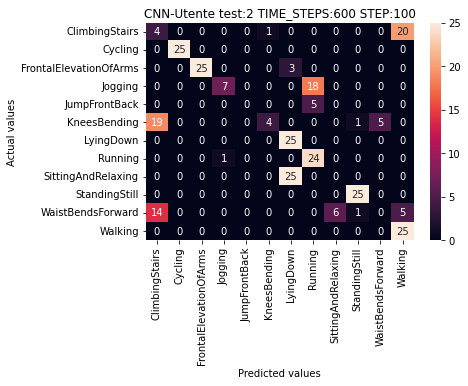

Utente test:  3
Training: x-> 1975 y-> 1975
Validation: x-> 494 y-> 494
Testing: x-> 286 y-> 286
Total: x-> 2755 y-> 2755
Epoch 1/100
16/16 [==============================] - 1s 54ms/step - loss: 2.0424 - accuracy: 0.2415 - f1_m: 0.1662 - val_loss: 1.5578 - val_accuracy: 0.3806 - val_f1_m: 0.2965
Epoch 2/100
16/16 [==============================] - 1s 36ms/step - loss: 1.5153 - accuracy: 0.4132 - f1_m: 0.3694 - val_loss: 1.2898 - val_accuracy: 0.5202 - val_f1_m: 0.3604
Epoch 3/100
16/16 [==============================] - 1s 36ms/step - loss: 1.2299 - accuracy: 0.5119 - f1_m: 0.4724 - val_loss: 1.0188 - val_accuracy: 0.6235 - val_f1_m: 0.5117
Epoch 4/100
16/16 [==============================] - 1s 37ms/step - loss: 1.0265 - accuracy: 0.5959 - f1_m: 0.5733 - val_loss: 0.8856 - val_accuracy: 0.7166 - val_f1_m: 0.6100
Epoch 5/100
16/16 [==============================] - 1s 35ms/step - loss: 0.8614 - accuracy: 0.6719 - f1_m: 0.6486 - val_loss: 0.7327 - val_accuracy: 0.7247 - val_f1_m: 0.720

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


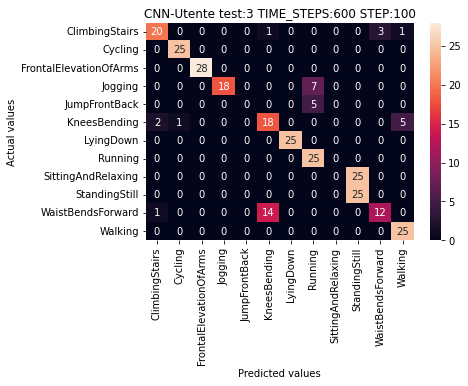

Utente test:  4
Training: x-> 1975 y-> 1975
Validation: x-> 494 y-> 494
Testing: x-> 286 y-> 286
Total: x-> 2755 y-> 2755
Epoch 1/100
16/16 [==============================] - 1s 54ms/step - loss: 2.0937 - accuracy: 0.2263 - f1_m: 0.1657 - val_loss: 1.6468 - val_accuracy: 0.3563 - val_f1_m: 0.2504
Epoch 2/100
16/16 [==============================] - 1s 34ms/step - loss: 1.5125 - accuracy: 0.4299 - f1_m: 0.4146 - val_loss: 1.2871 - val_accuracy: 0.4656 - val_f1_m: 0.4387
Epoch 3/100
16/16 [==============================] - 1s 34ms/step - loss: 1.2124 - accuracy: 0.5342 - f1_m: 0.5245 - val_loss: 1.0884 - val_accuracy: 0.5445 - val_f1_m: 0.5170
Epoch 4/100
16/16 [==============================] - 1s 35ms/step - loss: 1.0089 - accuracy: 0.6299 - f1_m: 0.5825 - val_loss: 1.0474 - val_accuracy: 0.5648 - val_f1_m: 0.5943
Epoch 5/100
16/16 [==============================] - 1s 36ms/step - loss: 0.8464 - accuracy: 0.6861 - f1_m: 0.6634 - val_loss: 0.8264 - val_accuracy: 0.6660 - val_f1_m: 0.654

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


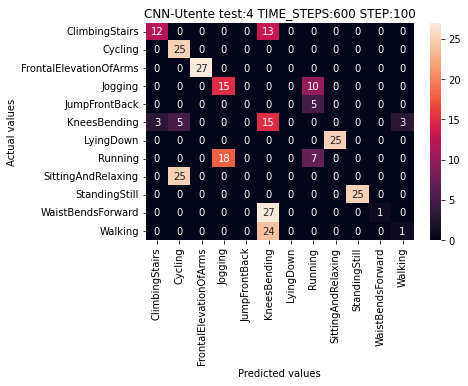

Utente test:  5
Training: x-> 1986 y-> 1986
Validation: x-> 497 y-> 497
Testing: x-> 272 y-> 272
Total: x-> 2755 y-> 2755
Epoch 1/100
16/16 [==============================] - 1s 53ms/step - loss: 2.1615 - accuracy: 0.1727 - f1_m: 0.1497 - val_loss: 1.7618 - val_accuracy: 0.2757 - val_f1_m: 0.2529
Epoch 2/100
16/16 [==============================] - 1s 34ms/step - loss: 1.6253 - accuracy: 0.3625 - f1_m: 0.3462 - val_loss: 1.3609 - val_accuracy: 0.4769 - val_f1_m: 0.3809
Epoch 3/100
16/16 [==============================] - 1s 34ms/step - loss: 1.2698 - accuracy: 0.5257 - f1_m: 0.4845 - val_loss: 1.0191 - val_accuracy: 0.5755 - val_f1_m: 0.5372
Epoch 4/100
16/16 [==============================] - 1s 34ms/step - loss: 1.0247 - accuracy: 0.6123 - f1_m: 0.5932 - val_loss: 0.8501 - val_accuracy: 0.6600 - val_f1_m: 0.6373
Epoch 5/100
16/16 [==============================] - 1s 33ms/step - loss: 0.8588 - accuracy: 0.6742 - f1_m: 0.6563 - val_loss: 0.8745 - val_accuracy: 0.6841 - val_f1_m: 0.699

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


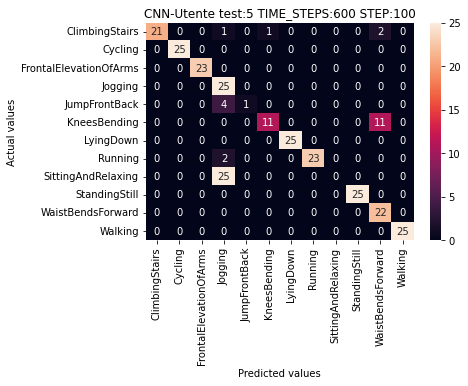

Utente test:  6
Training: x-> 2000 y-> 2000
Validation: x-> 500 y-> 500
Testing: x-> 255 y-> 255
Total: x-> 2755 y-> 2755
Epoch 1/100
16/16 [==============================] - 2s 62ms/step - loss: 2.1453 - accuracy: 0.2140 - f1_m: 0.1128 - val_loss: 1.7367 - val_accuracy: 0.4140 - val_f1_m: 0.1943
Epoch 2/100
16/16 [==============================] - 1s 37ms/step - loss: 1.4430 - accuracy: 0.4505 - f1_m: 0.4066 - val_loss: 1.1751 - val_accuracy: 0.5840 - val_f1_m: 0.4824
Epoch 3/100
16/16 [==============================] - 1s 37ms/step - loss: 1.0682 - accuracy: 0.5990 - f1_m: 0.5750 - val_loss: 0.9219 - val_accuracy: 0.6720 - val_f1_m: 0.6190
Epoch 4/100
16/16 [==============================] - 1s 35ms/step - loss: 0.8407 - accuracy: 0.6915 - f1_m: 0.6646 - val_loss: 0.7284 - val_accuracy: 0.7460 - val_f1_m: 0.7543
Epoch 5/100
16/16 [==============================] - 1s 37ms/step - loss: 0.6811 - accuracy: 0.7585 - f1_m: 0.7383 - val_loss: 0.6110 - val_accuracy: 0.7780 - val_f1_m: 0.774

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


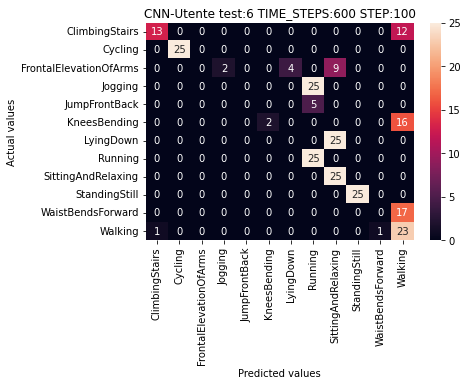

Utente test:  7
Training: x-> 1984 y-> 1984
Validation: x-> 496 y-> 496
Testing: x-> 275 y-> 275
Total: x-> 2755 y-> 2755
Epoch 1/100
16/16 [==============================] - 1s 55ms/step - loss: 2.2071 - accuracy: 0.1925 - f1_m: 0.1085 - val_loss: 1.9952 - val_accuracy: 0.2641 - val_f1_m: 0.2016
Epoch 2/100
16/16 [==============================] - 1s 35ms/step - loss: 1.7125 - accuracy: 0.3342 - f1_m: 0.3410 - val_loss: 1.6342 - val_accuracy: 0.3891 - val_f1_m: 0.2785
Epoch 3/100
16/16 [==============================] - 1s 35ms/step - loss: 1.3364 - accuracy: 0.5071 - f1_m: 0.4651 - val_loss: 1.1196 - val_accuracy: 0.5161 - val_f1_m: 0.4762
Epoch 4/100
16/16 [==============================] - 1s 37ms/step - loss: 1.0027 - accuracy: 0.6190 - f1_m: 0.5975 - val_loss: 0.8448 - val_accuracy: 0.7157 - val_f1_m: 0.6816
Epoch 5/100
16/16 [==============================] - 1s 36ms/step - loss: 0.8128 - accuracy: 0.7046 - f1_m: 0.6882 - val_loss: 0.7515 - val_accuracy: 0.7339 - val_f1_m: 0.693

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


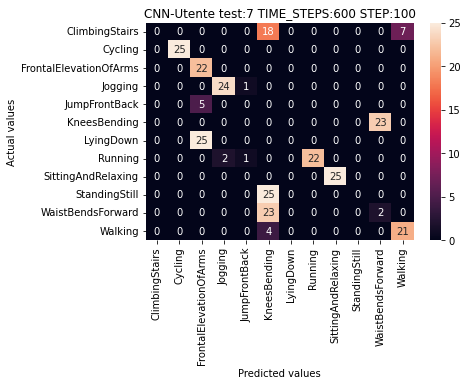

Utente test:  8
Training: x-> 1991 y-> 1991
Validation: x-> 498 y-> 498
Testing: x-> 266 y-> 266
Total: x-> 2755 y-> 2755
Epoch 1/100
16/16 [==============================] - 1s 53ms/step - loss: 2.3850 - accuracy: 0.1522 - f1_m: 0.0431 - val_loss: 1.9508 - val_accuracy: 0.3474 - val_f1_m: 0.0568
Epoch 2/100
16/16 [==============================] - 1s 37ms/step - loss: 1.7176 - accuracy: 0.3461 - f1_m: 0.2731 - val_loss: 1.3684 - val_accuracy: 0.5161 - val_f1_m: 0.4772
Epoch 3/100
16/16 [==============================] - 1s 35ms/step - loss: 1.3522 - accuracy: 0.4867 - f1_m: 0.4647 - val_loss: 1.0789 - val_accuracy: 0.5783 - val_f1_m: 0.5648
Epoch 4/100
16/16 [==============================] - 1s 37ms/step - loss: 1.1570 - accuracy: 0.5475 - f1_m: 0.5117 - val_loss: 0.9370 - val_accuracy: 0.6727 - val_f1_m: 0.6004
Epoch 5/100
16/16 [==============================] - 1s 35ms/step - loss: 0.9650 - accuracy: 0.6374 - f1_m: 0.6034 - val_loss: 0.8291 - val_accuracy: 0.7048 - val_f1_m: 0.632

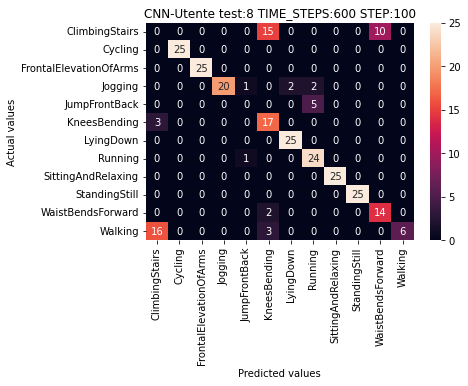

Utente test:  9
Training: x-> 1984 y-> 1984
Validation: x-> 496 y-> 496
Testing: x-> 275 y-> 275
Total: x-> 2755 y-> 2755
Epoch 1/100
16/16 [==============================] - 1s 54ms/step - loss: 2.2563 - accuracy: 0.1754 - f1_m: 0.0992 - val_loss: 1.9442 - val_accuracy: 0.2722 - val_f1_m: 0.1911
Epoch 2/100
16/16 [==============================] - 1s 35ms/step - loss: 1.6947 - accuracy: 0.3523 - f1_m: 0.3016 - val_loss: 1.3849 - val_accuracy: 0.4496 - val_f1_m: 0.3195
Epoch 3/100
16/16 [==============================] - 1s 34ms/step - loss: 1.3018 - accuracy: 0.5081 - f1_m: 0.4265 - val_loss: 1.1138 - val_accuracy: 0.5605 - val_f1_m: 0.4425
Epoch 4/100
16/16 [==============================] - 1s 36ms/step - loss: 1.0449 - accuracy: 0.6003 - f1_m: 0.5446 - val_loss: 0.9102 - val_accuracy: 0.6190 - val_f1_m: 0.6229
Epoch 5/100
16/16 [==============================] - 1s 35ms/step - loss: 0.8984 - accuracy: 0.6628 - f1_m: 0.6322 - val_loss: 0.8323 - val_accuracy: 0.6714 - val_f1_m: 0.658

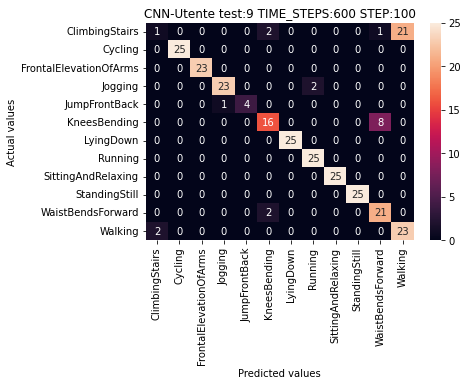

Utente test:  10
Training: x-> 1988 y-> 1988
Validation: x-> 498 y-> 498
Testing: x-> 269 y-> 269
Total: x-> 2755 y-> 2755
Epoch 1/100
16/16 [==============================] - 1s 55ms/step - loss: 2.2031 - accuracy: 0.2022 - f1_m: 0.1406 - val_loss: 1.8033 - val_accuracy: 0.2932 - val_f1_m: 0.2540
Epoch 2/100
16/16 [==============================] - 1s 37ms/step - loss: 1.6528 - accuracy: 0.3763 - f1_m: 0.3495 - val_loss: 1.3873 - val_accuracy: 0.4076 - val_f1_m: 0.3909
Epoch 3/100
16/16 [==============================] - 1s 35ms/step - loss: 1.3489 - accuracy: 0.4839 - f1_m: 0.4618 - val_loss: 1.1130 - val_accuracy: 0.6225 - val_f1_m: 0.5288
Epoch 4/100
16/16 [==============================] - 1s 35ms/step - loss: 1.1596 - accuracy: 0.5473 - f1_m: 0.5106 - val_loss: 0.9955 - val_accuracy: 0.6426 - val_f1_m: 0.5436
Epoch 5/100
16/16 [==============================] - 1s 36ms/step - loss: 0.9906 - accuracy: 0.6182 - f1_m: 0.5717 - val_loss: 0.9264 - val_accuracy: 0.6165 - val_f1_m: 0.62

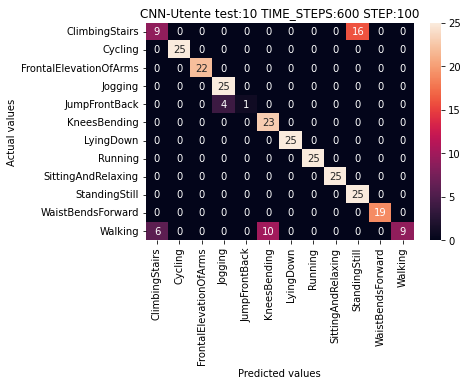

Accuracy media: 0.7007221434589803
F1 weighted media: 0.660358039843148
F1 macro media: 0.6238064288899069
   Time Steps  Step  Average accuracy  Average F1 Weighted  Average F1 Macro  \
0         600   100          0.700722             0.660358          0.623806   

                                             reports  \
0  [              precision    recall  f1-score  ...   

                                    confusion_matrix  
0  [AxesSubplot(0.125,0.125;0.62x0.755), AxesSubp...  


In [103]:
import itertools
import gc
from tabnanny import verbose
from tkinter import Y
batchsize=128

if leave_one_subject_out:
    cnn_results_dict = []
    cnn_results = pd.DataFrame()
    try:
        mkdir(cnn_dir + leave_one_subject_out_dir)
        mkdir(cnn_dir + leave_one_subject_out_dir + plot_dir)
    except OSError as error:
        print(error)

    for config in itertools.product(time_steps_list, step_list):

        time_step = config[0]
        step=config[1]

        cnn_f1_macro = []
        cnn_f1_weighted = []
        cnn_acc = []
        cnn_class_reports = []
        cnn_confusion_matrixes = []

        print(time_step,step)

        for user_id in users_ids:

            print("Utente test: ", user_id)

            X_test = np.array(data_cnn[time_step][step][user_id][0])
            y_test = np.array(data_cnn[time_step][step][user_id][1])

            X_train = []
            y_train = []

            for id in users_ids:
                if not id == user_id:
                    X_train += data_cnn[time_step][step][id][0]
                    y_train += data_cnn[time_step][step][id][1]
            
            X_train = np.array(X_train)
            y_train = np.array(y_train)

            scaler = RobustScaler()
            X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
            X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

            y_train = enc.transform(y_train)
            y_test = enc.transform(y_test)

            X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
            X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

      #      print(X_train)
       #     print(y_train)
        #    print(X_test)

         #   print(y_test)

            model = createCNN(X_train[0].shape, y_train[0].shape[0])

            callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

            XTraining, XValidation, YTraining, YValidation = train_test_split(X_train,y_train,stratify=y_train,test_size=0.2)

            print("Training: x->",len(XTraining),"y->",len(YTraining))
            print("Validation: x->",len(XValidation),"y->",len(YValidation))
            print("Testing: x->",len(X_test),"y->",len(y_test))
            print("Total: x->",len(XTraining)+len(XValidation)+len(X_test),"y->",len(YTraining)+len(YValidation)+len(y_test))

            model.fit(XTraining, YTraining, batch_size = batchsize, epochs = 100, validation_data=(XValidation,YValidation), verbose=1, callbacks=[callback], shuffle=True, workers=10, use_multiprocessing=True )

            rounded_labels=np.argmax(y_test, axis=1)
            y_pred = np.argmax(model.predict(X_test), axis=-1)

            cnn_acc.append(accuracy_score(rounded_labels, y_pred))
            cnn_f1_weighted.append(f1_score(rounded_labels, y_pred, average='weighted'))
            cnn_f1_macro.append(f1_score(rounded_labels, y_pred, average='macro'))
            #cnn_f1.append(f1_m(rounded_labels,y_pred))

            class_report = classification_report(rounded_labels, y_pred, digits=4)
            print(class_report)
            cnn_class_reports.append(class_report)
            
            conf_matrix = confusion_matrix(rounded_labels, y_pred, labels=range(0,len(enc.categories_[0])))

            ax = seaborn.heatmap(conf_matrix, annot=True, fmt='d')

            ax.set_title("CNN-Utente test:" + str(user_id) + " TIME_STEPS:"+str(time_step)+" STEP:"+str(step))

            ax.set_xlabel('Predicted values')
            ax.set_ylabel('Actual values')

            ax.xaxis.set_ticklabels(enc.categories_[0].tolist(), rotation=90)
            ax.yaxis.set_ticklabels(enc.categories_[0].tolist(), rotation=0)

            ax.get_figure().savefig(cnn_dir + leave_one_subject_out_dir + plot_dir +'/'+ax.get_title().replace(":"," ")+".png", dpi=500)
            #model_history_file=open(cnn_dir+'/'+ax.get_title().replace(":"," ")+".txt", "w")
            #model_history_file.write(model.history())
            #model_history_file.close()

            cnn_confusion_matrixes.append(ax)
            plt.show()

            gc.collect()            

        print("Accuracy media:",np.mean(cnn_acc))
        print("F1 weighted media:",np.mean(cnn_f1_weighted))
        print("F1 macro media:",np.mean(cnn_f1_macro))

        cnn_results_dict.append({
            'Time Steps':time_step,
            'Step':step,
            'Average accuracy':np.mean(cnn_acc),
            'Average F1 Weighted': np.mean(cnn_f1_weighted),
            'Average F1 Macro': np.mean(cnn_f1_macro),
            'reports':cnn_class_reports,
            'confusion_matrix':cnn_confusion_matrixes
        })
        
        cnn_results = pd.DataFrame(cnn_results_dict)
        print(cnn_results)
        cnn_results.to_csv(cnn_dir + leave_one_subject_out_dir + result_filename)


In [ ]:
print(np.unique(y_pred))
print(np.unique(y_test))

# Bi-LSTM

In [104]:
bilstm_dir = folder_name + "\\bilstm"
bilstm_plot_dir = bilstm_dir + "\\plot"
bilstm_result_filename = bilstm_dir + "\\result.csv"
bilstm_config_filename = bilstm_dir + "\\config_bilstm.txt"

mkdir(bilstm_dir)
mkdir(bilstm_plot_dir)

FileExistsError: ignored

In [105]:
def createBiLSTM(input_size, output_size):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=64, return_sequences=True, input_shape=input_size)))
    model.add(Dropout(rate=0.2))
    model.add(Bidirectional(LSTM(units=64)))
    model.add(Dropout(rate=0.2))

    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(output_size, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


    
    return model

In [106]:
data_cnn = tuple_by_timestep

16/16 [==============================] - 2s 122ms/step - loss: 0.8479 - accuracy: 0.6715 - val_loss: 0.9955 - val_accuracy: 0.6185
Epoch 18/100
16/16 [==============================] - 2s 119ms/step - loss: 1.1415 - accuracy: 0.5520 - val_loss: 0.8832 - val_accuracy: 0.6526
Epoch 19/100
16/16 [==============================] - 2s 121ms/step - loss: 1.0228 - accuracy: 0.5826 - val_loss: 0.8647 - val_accuracy: 0.6345
Epoch 20/100
16/16 [==============================] - 2s 121ms/step - loss: 0.9639 - accuracy: 0.6017 - val_loss: 0.8612 - val_accuracy: 0.6426
Epoch 21/100
16/16 [==============================] - 2s 123ms/step - loss: 0.9609 - accuracy: 0.5967 - val_loss: 0.8185 - val_accuracy: 0.6707
Epoch 21: early stopping
9/9 [==============================] - 1s 38ms/step
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        25
           1     1.0000    1.0000    1.0000        25
           2     1.0000    1.0000    1.0000        25

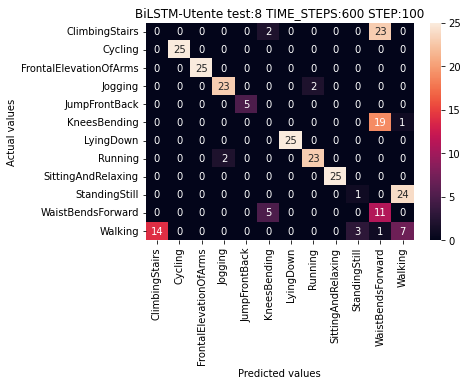

Utente test:  9
Epoch 1/100
16/16 [==============================] - 9s 207ms/step - loss: 2.2884 - accuracy: 0.2399 - val_loss: 1.9299 - val_accuracy: 0.3246
Epoch 2/100
16/16 [==============================] - 2s 119ms/step - loss: 1.8493 - accuracy: 0.3246 - val_loss: 1.4652 - val_accuracy: 0.4294
Epoch 3/100
16/16 [==============================] - 2s 119ms/step - loss: 1.5149 - accuracy: 0.4088 - val_loss: 1.2545 - val_accuracy: 0.4456
Epoch 4/100
16/16 [==============================] - 2s 119ms/step - loss: 1.3398 - accuracy: 0.4582 - val_loss: 1.1233 - val_accuracy: 0.5282
Epoch 5/100
16/16 [==============================] - 2s 119ms/step - loss: 1.2060 - accuracy: 0.5161 - val_loss: 1.0274 - val_accuracy: 0.5786
Epoch 6/100
16/16 [==============================] - 2s 120ms/step - loss: 1.0941 - accuracy: 0.5529 - val_loss: 0.9595 - val_accuracy: 0.5867
Epoch 7/100
16/16 [==============================] - 2s 119ms/step - loss: 1.0337 - accuracy: 0.5801 - val_loss: 1.0488 - val_

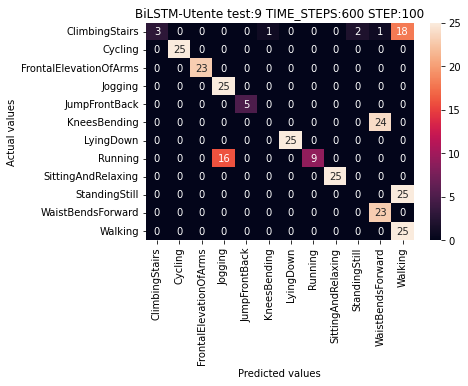

Utente test:  10
Epoch 1/100
16/16 [==============================] - 9s 204ms/step - loss: 2.2237 - accuracy: 0.2460 - val_loss: 1.7619 - val_accuracy: 0.3896
Epoch 2/100
16/16 [==============================] - 2s 115ms/step - loss: 1.6942 - accuracy: 0.3647 - val_loss: 1.3314 - val_accuracy: 0.4679
Epoch 3/100
16/16 [==============================] - 2s 117ms/step - loss: 1.5036 - accuracy: 0.4120 - val_loss: 1.2132 - val_accuracy: 0.4920
Epoch 4/100
16/16 [==============================] - 2s 116ms/step - loss: 1.3655 - accuracy: 0.4668 - val_loss: 1.0990 - val_accuracy: 0.5361
Epoch 5/100
16/16 [==============================] - 2s 117ms/step - loss: 1.2652 - accuracy: 0.4889 - val_loss: 1.0577 - val_accuracy: 0.5502
Epoch 6/100
16/16 [==============================] - 2s 116ms/step - loss: 1.1917 - accuracy: 0.5075 - val_loss: 0.9617 - val_accuracy: 0.6064
Epoch 7/100
16/16 [==============================] - 2s 116ms/step - loss: 1.1815 - accuracy: 0.5282 - val_loss: 0.9913 - val

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0     0.3279    0.8000    0.4651        25
           1     1.0000    0.8400    0.9130        25
           2     1.0000    1.0000    1.0000        22
           3     1.0000    1.0000    1.0000        25
           4     1.0000    1.0000    1.0000         5
           5     0.6364    0.3043    0.4118        23
           6     1.0000    1.0000    1.0000        25
           7     1.0000    1.0000    1.0000        25
           8     0.8621    1.0000    0.9259        25
           9     0.9615    1.0000    0.9804        25
          10     0.5263    0.5263    0.5263        19
          11     0.0000    0.0000    0.0000        25

    accuracy                         0.7807       269
   macro avg     0.7762    0.7892    0.7685       269
weighted avg     0.7637    0.7807    0.7568       269



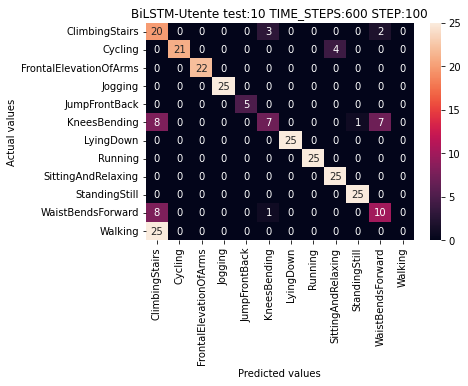

Accuracy media: 0.57665922165475
F1 media macro: 0.5400410864944833
F1 media weighted: 0.5400410864944833
600 100
Utente test:  1
Epoch 1/100
16/16 [==============================] - 9s 204ms/step - loss: 2.1415 - accuracy: 0.3015 - val_loss: 1.5866 - val_accuracy: 0.4828
Epoch 2/100
16/16 [==============================] - 2s 114ms/step - loss: 1.5443 - accuracy: 0.4390 - val_loss: 1.2196 - val_accuracy: 0.5495
Epoch 3/100
16/16 [==============================] - 2s 116ms/step - loss: 1.3138 - accuracy: 0.5266 - val_loss: 1.0407 - val_accuracy: 0.6404
Epoch 4/100
16/16 [==============================] - 2s 115ms/step - loss: 1.1649 - accuracy: 0.5675 - val_loss: 0.9633 - val_accuracy: 0.6626
Epoch 5/100
16/16 [==============================] - 2s 115ms/step - loss: 1.0459 - accuracy: 0.6206 - val_loss: 0.8413 - val_accuracy: 0.6646
Epoch 6/100
16/16 [==============================] - 2s 116ms/step - loss: 0.9658 - accuracy: 0.6353 - val_loss: 0.8094 - val_accuracy: 0.6889
Epoch 7/100


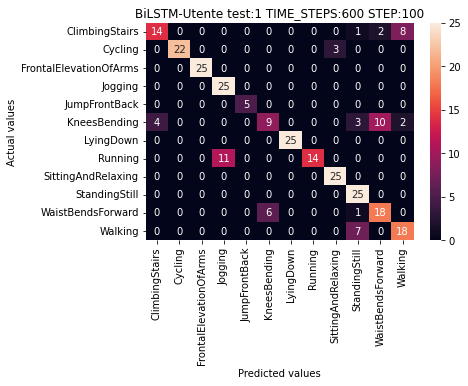

Utente test:  2
Epoch 1/100
16/16 [==============================] - 9s 202ms/step - loss: 2.1588 - accuracy: 0.2266 - val_loss: 1.6980 - val_accuracy: 0.4676
Epoch 2/100
16/16 [==============================] - 2s 112ms/step - loss: 1.6374 - accuracy: 0.4121 - val_loss: 1.2503 - val_accuracy: 0.5526
Epoch 3/100
16/16 [==============================] - 2s 115ms/step - loss: 1.3261 - accuracy: 0.4957 - val_loss: 1.0594 - val_accuracy: 0.5749
Epoch 4/100
16/16 [==============================] - 2s 115ms/step - loss: 1.1968 - accuracy: 0.5357 - val_loss: 1.0028 - val_accuracy: 0.6255
Epoch 5/100
16/16 [==============================] - 2s 115ms/step - loss: 1.1237 - accuracy: 0.5727 - val_loss: 0.9248 - val_accuracy: 0.6215
Epoch 6/100
16/16 [==============================] - 2s 113ms/step - loss: 1.0031 - accuracy: 0.6138 - val_loss: 0.8323 - val_accuracy: 0.6842
Epoch 7/100
16/16 [==============================] - 2s 115ms/step - loss: 0.9474 - accuracy: 0.6351 - val_loss: 0.7662 - val_

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


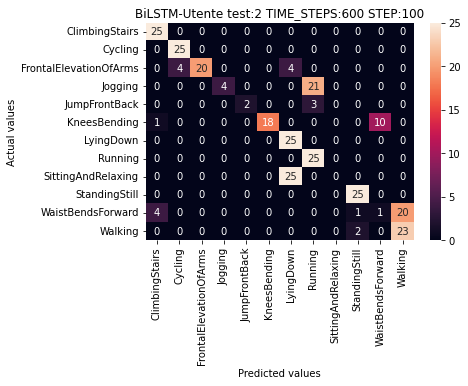

Utente test:  3
Epoch 1/100
16/16 [==============================] - 9s 202ms/step - loss: 2.1298 - accuracy: 0.2947 - val_loss: 1.6164 - val_accuracy: 0.4271
Epoch 2/100
16/16 [==============================] - 2s 115ms/step - loss: 1.5115 - accuracy: 0.4435 - val_loss: 1.1559 - val_accuracy: 0.5607
Epoch 3/100
16/16 [==============================] - 2s 115ms/step - loss: 1.2739 - accuracy: 0.5033 - val_loss: 1.0306 - val_accuracy: 0.6012
Epoch 4/100
16/16 [==============================] - 2s 114ms/step - loss: 1.1004 - accuracy: 0.5777 - val_loss: 0.9352 - val_accuracy: 0.6235
Epoch 5/100
16/16 [==============================] - 2s 115ms/step - loss: 0.9872 - accuracy: 0.6273 - val_loss: 0.8228 - val_accuracy: 0.6842
Epoch 6/100
16/16 [==============================] - 2s 114ms/step - loss: 0.9114 - accuracy: 0.6491 - val_loss: 0.7797 - val_accuracy: 0.6923
Epoch 7/100
16/16 [==============================] - 2s 115ms/step - loss: 0.8607 - accuracy: 0.6527 - val_loss: 0.7514 - val_

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


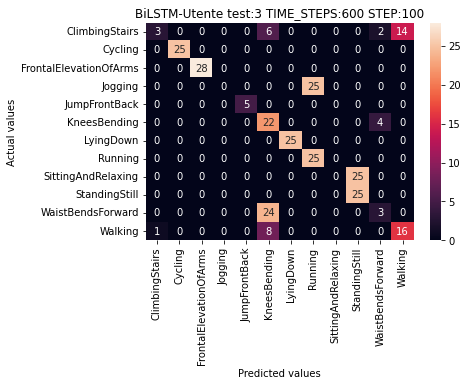

Utente test:  4
Epoch 1/100
16/16 [==============================] - 9s 201ms/step - loss: 2.1735 - accuracy: 0.2390 - val_loss: 1.7083 - val_accuracy: 0.4453
Epoch 2/100
16/16 [==============================] - 2s 114ms/step - loss: 1.5948 - accuracy: 0.4208 - val_loss: 1.1528 - val_accuracy: 0.5992
Epoch 3/100
16/16 [==============================] - 2s 115ms/step - loss: 1.2438 - accuracy: 0.5332 - val_loss: 0.9173 - val_accuracy: 0.6619
Epoch 4/100
16/16 [==============================] - 2s 114ms/step - loss: 1.0450 - accuracy: 0.5873 - val_loss: 0.8147 - val_accuracy: 0.7186
Epoch 5/100
16/16 [==============================] - 2s 114ms/step - loss: 0.9721 - accuracy: 0.6203 - val_loss: 0.7954 - val_accuracy: 0.6903
Epoch 6/100
16/16 [==============================] - 2s 115ms/step - loss: 0.8802 - accuracy: 0.6678 - val_loss: 0.7158 - val_accuracy: 0.7247
Epoch 7/100
16/16 [==============================] - 2s 116ms/step - loss: 0.8191 - accuracy: 0.6775 - val_loss: 0.6827 - val_

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


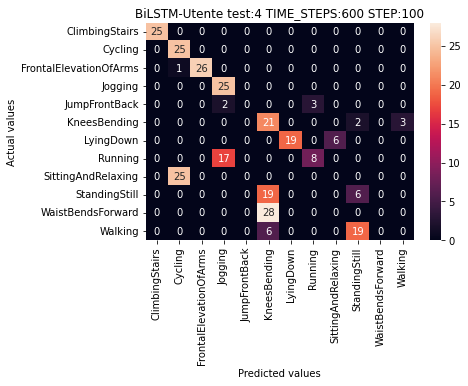

Utente test:  5
Epoch 1/100
16/16 [==============================] - 9s 205ms/step - loss: 2.1146 - accuracy: 0.3031 - val_loss: 1.6148 - val_accuracy: 0.4487
Epoch 2/100
16/16 [==============================] - 2s 116ms/step - loss: 1.5629 - accuracy: 0.4330 - val_loss: 1.1583 - val_accuracy: 0.5674
Epoch 3/100
16/16 [==============================] - 2s 116ms/step - loss: 1.2722 - accuracy: 0.5136 - val_loss: 0.9707 - val_accuracy: 0.6036
Epoch 4/100
16/16 [==============================] - 2s 118ms/step - loss: 1.1344 - accuracy: 0.5498 - val_loss: 0.8961 - val_accuracy: 0.6620
Epoch 5/100
16/16 [==============================] - 2s 116ms/step - loss: 1.0392 - accuracy: 0.5911 - val_loss: 0.8929 - val_accuracy: 0.6378
Epoch 6/100
16/16 [==============================] - 2s 117ms/step - loss: 0.9746 - accuracy: 0.6163 - val_loss: 0.7964 - val_accuracy: 0.6640
Epoch 7/100
16/16 [==============================] - 2s 116ms/step - loss: 0.8831 - accuracy: 0.6501 - val_loss: 0.7731 - val_

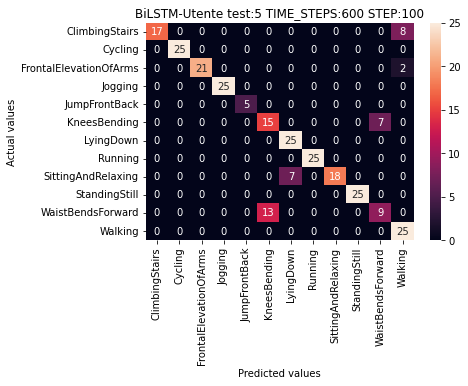

Utente test:  6
Epoch 1/100
16/16 [==============================] - 9s 205ms/step - loss: 2.1810 - accuracy: 0.2725 - val_loss: 1.6869 - val_accuracy: 0.4560
Epoch 2/100
16/16 [==============================] - 2s 118ms/step - loss: 1.5925 - accuracy: 0.4305 - val_loss: 1.1761 - val_accuracy: 0.5780
Epoch 3/100
16/16 [==============================] - 2s 115ms/step - loss: 1.3210 - accuracy: 0.5140 - val_loss: 0.9457 - val_accuracy: 0.6560
Epoch 4/100
16/16 [==============================] - 2s 118ms/step - loss: 1.1377 - accuracy: 0.5810 - val_loss: 0.8377 - val_accuracy: 0.6800
Epoch 5/100
16/16 [==============================] - 2s 118ms/step - loss: 1.0267 - accuracy: 0.6065 - val_loss: 0.8283 - val_accuracy: 0.6540
Epoch 6/100
16/16 [==============================] - 2s 117ms/step - loss: 0.9558 - accuracy: 0.6320 - val_loss: 0.7599 - val_accuracy: 0.7140
Epoch 7/100
16/16 [==============================] - 2s 117ms/step - loss: 0.8990 - accuracy: 0.6515 - val_loss: 0.7887 - val_

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        25
           1     1.0000    1.0000    1.0000        25
           2     1.0000    0.0667    0.1250        15
           3     0.0000    0.0000    0.0000        25
           4     1.0000    1.0000    1.0000         5
           5     1.0000    0.5556    0.7143        18
           6     0.0000    0.0000    0.0000        25
           7     0.5000    1.0000    0.6667        25
           8     0.4808    1.0000    0.6494        25
           9     0.8800    0.8800    0.8800        25
          10     0.3333    0.3529    0.3429        17
          11     0.2727    0.6000    0.3750        25

    accuracy                         0.5255       255
   macro avg     0.5389    0.5379    0.4794       255
weighted avg     0.4784    0.5255    0.4503       255



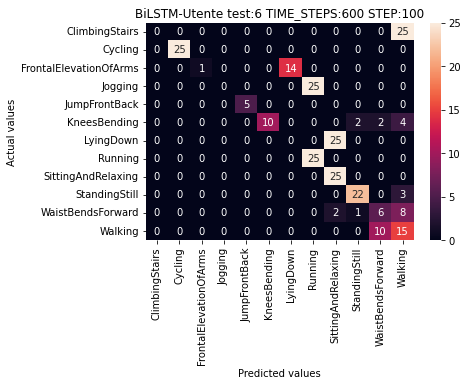

Utente test:  7
Epoch 1/100
16/16 [==============================] - 9s 208ms/step - loss: 2.1907 - accuracy: 0.2596 - val_loss: 1.7455 - val_accuracy: 0.4335
Epoch 2/100
16/16 [==============================] - 2s 117ms/step - loss: 1.6617 - accuracy: 0.3906 - val_loss: 1.2789 - val_accuracy: 0.4980
Epoch 3/100
16/16 [==============================] - 2s 118ms/step - loss: 1.3432 - accuracy: 0.4642 - val_loss: 1.0875 - val_accuracy: 0.5444
Epoch 4/100
16/16 [==============================] - 2s 118ms/step - loss: 1.1545 - accuracy: 0.5393 - val_loss: 0.9356 - val_accuracy: 0.6169
Epoch 5/100
16/16 [==============================] - 2s 116ms/step - loss: 1.0454 - accuracy: 0.5817 - val_loss: 0.9541 - val_accuracy: 0.6169
Epoch 6/100
16/16 [==============================] - 2s 117ms/step - loss: 0.9899 - accuracy: 0.6074 - val_loss: 0.8261 - val_accuracy: 0.6875
Epoch 7/100
16/16 [==============================] - 2s 119ms/step - loss: 0.9584 - accuracy: 0.6245 - val_loss: 0.8421 - val_

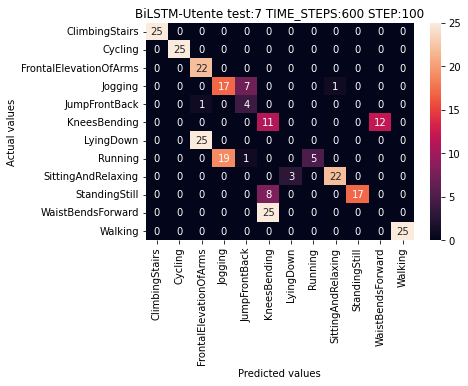

Utente test:  8
Epoch 1/100
16/16 [==============================] - 9s 203ms/step - loss: 2.1858 - accuracy: 0.2582 - val_loss: 1.7404 - val_accuracy: 0.4900
Epoch 2/100
16/16 [==============================] - 2s 115ms/step - loss: 1.6324 - accuracy: 0.4209 - val_loss: 1.2285 - val_accuracy: 0.5904
Epoch 3/100
16/16 [==============================] - 2s 118ms/step - loss: 1.3260 - accuracy: 0.5264 - val_loss: 1.0310 - val_accuracy: 0.5924
Epoch 4/100
16/16 [==============================] - 2s 116ms/step - loss: 1.1440 - accuracy: 0.5706 - val_loss: 0.9057 - val_accuracy: 0.6265
Epoch 5/100
16/16 [==============================] - 2s 118ms/step - loss: 1.0314 - accuracy: 0.6118 - val_loss: 0.8259 - val_accuracy: 0.6888
Epoch 6/100
16/16 [==============================] - 2s 117ms/step - loss: 0.9432 - accuracy: 0.6389 - val_loss: 0.7522 - val_accuracy: 0.6787
Epoch 7/100
16/16 [==============================] - 2s 116ms/step - loss: 0.8623 - accuracy: 0.6635 - val_loss: 0.6941 - val_

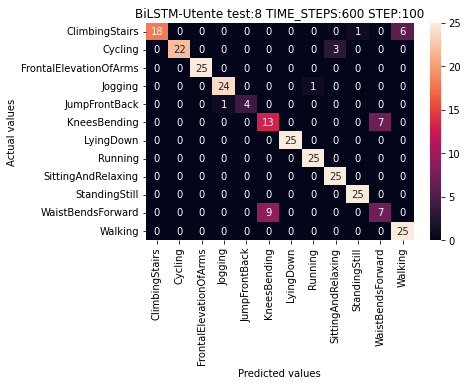

Utente test:  9
Epoch 1/100
16/16 [==============================] - 9s 205ms/step - loss: 2.1320 - accuracy: 0.2903 - val_loss: 1.5811 - val_accuracy: 0.4758
Epoch 2/100
16/16 [==============================] - 2s 115ms/step - loss: 1.5082 - accuracy: 0.4420 - val_loss: 1.1605 - val_accuracy: 0.5585
Epoch 3/100
16/16 [==============================] - 2s 117ms/step - loss: 1.2575 - accuracy: 0.5212 - val_loss: 1.0065 - val_accuracy: 0.5948
Epoch 4/100
16/16 [==============================] - 2s 117ms/step - loss: 1.0992 - accuracy: 0.5660 - val_loss: 0.9011 - val_accuracy: 0.6210
Epoch 5/100
16/16 [==============================] - 2s 117ms/step - loss: 0.9751 - accuracy: 0.6225 - val_loss: 0.8454 - val_accuracy: 0.6593
Epoch 6/100
16/16 [==============================] - 2s 116ms/step - loss: 0.9030 - accuracy: 0.6376 - val_loss: 0.8109 - val_accuracy: 0.6815
Epoch 7/100
16/16 [==============================] - 2s 117ms/step - loss: 0.8976 - accuracy: 0.6452 - val_loss: 0.7512 - val_

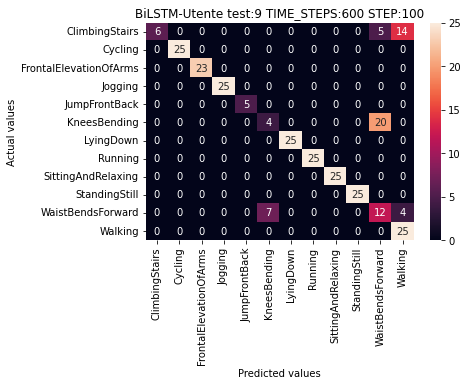

Utente test:  10
Epoch 1/100
16/16 [==============================] - 9s 204ms/step - loss: 2.1348 - accuracy: 0.2676 - val_loss: 1.6494 - val_accuracy: 0.4177
Epoch 2/100
16/16 [==============================] - 2s 117ms/step - loss: 1.5931 - accuracy: 0.4326 - val_loss: 1.2078 - val_accuracy: 0.5281
Epoch 3/100
16/16 [==============================] - 2s 118ms/step - loss: 1.3332 - accuracy: 0.5005 - val_loss: 1.0322 - val_accuracy: 0.6386
Epoch 4/100
16/16 [==============================] - 2s 118ms/step - loss: 1.1466 - accuracy: 0.5805 - val_loss: 0.8624 - val_accuracy: 0.7028
Epoch 5/100
16/16 [==============================] - 2s 118ms/step - loss: 1.0204 - accuracy: 0.6283 - val_loss: 0.8078 - val_accuracy: 0.6867
Epoch 6/100
16/16 [==============================] - 2s 118ms/step - loss: 0.9728 - accuracy: 0.6484 - val_loss: 0.7222 - val_accuracy: 0.6908
Epoch 7/100
16/16 [==============================] - 2s 119ms/step - loss: 0.8685 - accuracy: 0.6685 - val_loss: 0.6851 - val

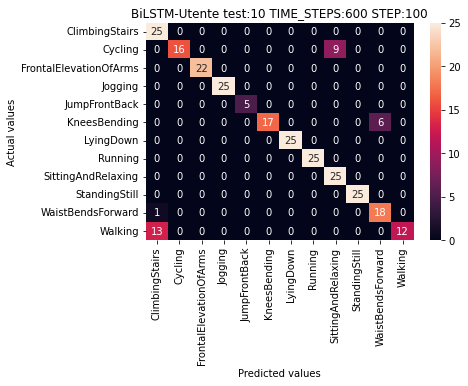

Accuracy media: 0.7249694715503521
F1 media macro: 0.693318870993806
F1 media weighted: 0.693318870993806


In [107]:
import itertools
import gc
bilstm_results_dict = []
bilstm_results = pd.DataFrame()

if bilstm_one_subject_out:

    for config in itertools.product(time_steps_list, step_list):

        time_step = config[0]
        step=config[1]

        bilstm_f1_weighted = []
        bilstm_f1_macro = []
        bilstm_acc = []
        bilstm_class_reports = []
        bilstm_confusion_matrixes = []

        print(time_step,step)

        for user_id in users_ids:

            print("Utente test: ", user_id)

            X_test = np.array(data_cnn[time_step][step][user_id][0])
            y_test = np.array(data_cnn[time_step][step][user_id][1])

            X_train = []
            y_train = []

            for id in users_ids:
                if id != user_id:
                    X_train += data_cnn[time_step][step][id][0]
                    y_train += data_cnn[time_step][step][id][1]
            
            X_train = np.array(X_train)
            y_train = np.array(y_train)

            y_train = enc.transform(y_train)
            y_test = enc.transform(y_test)

            scaler = RobustScaler()
            X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
            X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
            
            #X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
            #X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

            model = createBiLSTM([X_train[0].shape[0], X_train[0].shape[1]], y_train[0].shape[0])

            callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=True, restore_best_weights=True)

            XTraining, XValidation, YTraining, YValidation = train_test_split(X_train,y_train,stratify=y_train,test_size=0.2)

            model.fit(XTraining, YTraining, batch_size = batchsize, epochs = 100, validation_data=(XValidation,YValidation), verbose=1, callbacks=[callback], shuffle=True )
            
            rounded_labels=np.argmax(y_test, axis=1)
            y_pred = np.argmax(model.predict(X_test), axis=-1)

            bilstm_acc.append(accuracy_score(rounded_labels, y_pred))
            bilstm_f1_weighted.append(f1_score(rounded_labels, y_pred, average='weighted'))
            bilstm_f1_macro.append(f1_score(rounded_labels, y_pred, average='macro'))
            #bilstm_f1.append(f1_m(rounded_labels,y_pred))

            class_report = classification_report(rounded_labels, y_pred, digits=4)
            print(class_report)
            bilstm_class_reports.append(class_report)
            
            conf_matrix = confusion_matrix(rounded_labels, y_pred, labels=range(0,len(enc.categories_[0])))

            ax = seaborn.heatmap(conf_matrix, annot=True, fmt='d')

            ax.set_title("BiLSTM-Utente test:" + str(user_id) + " TIME_STEPS:"+str(time_step)+" STEP:"+str(step))

            ax.set_xlabel('Predicted values')
            ax.set_ylabel('Actual values')

            ax.xaxis.set_ticklabels(enc.categories_[0].tolist(), rotation=90)
            ax.yaxis.set_ticklabels(enc.categories_[0].tolist(), rotation=0)

            ax.get_figure().savefig(bilstm_plot_dir+'/'+ax.get_title().replace(":"," ")+".png", dpi=500)

            bilstm_confusion_matrixes.append(ax)
            plt.show()

            gc.collect()





            

        print("Accuracy media:",np.mean(bilstm_acc))
        print("F1 media macro:",np.mean(bilstm_f1_macro))
        print("F1 media weighted:",np.mean(bilstm_f1_macro))

        bilstm_results_dict.append({
            'Time Steps':time_step,
            'Step':step,
            'Average accuracy':np.mean(bilstm_acc),
            'Average F1 weighted': np.mean(bilstm_f1_weighted),
            'Average F1 macro': np.mean(bilstm_f1_macro),
            'reports':bilstm_class_reports,
            'confusion_matrix':bilstm_confusion_matrixes
        })

    bilstm_config_file = open(bilstm_config_filename, "a")
    model.summary(print_fn=lambda x: bilstm_config_file.write(x))
    bilstm_config_file.close()

In [108]:
bilstm_results_dataframe = pd.DataFrame(bilstm_results_dict)
bilstm_results_dataframe.to_csv(bilstm_result_filename)
bilstm_results_dataframe

,Time Steps,Step,Average accuracy,Average F1 weighted,Average F1 macro,reports,confusion_matrix
0,600,100,0.724969,0.689946,0.693319,[ precision recall f1-score ...,"[AxesSubplot(0.125,0.125;0.62x0.755), AxesSubp..."


# SHALLOW LEARNING

## Random Forest

In [109]:
rf_dir = folder_name + "\\rf"
plot_dir = "\\plot"
result_filename = "\\result.csv"
config_filename = "\\config.txt"

try:
    mkdir(rf_dir )
    mkdir(rf_dir + plot_dir)
except OSError as error:
    print(error)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.3s finished
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Us

                        precision    recall  f1-score   support

        ClimbingStairs       0.79      0.44      0.56        25
               Cycling       1.00      1.00      1.00        25
FrontalElevationOfArms       0.62      1.00      0.77        25
               Jogging       0.00      0.00      0.00        25
         JumpFrontBack       0.17      0.40      0.24         5
          KneesBending       0.50      0.32      0.39        28
             LyingDown       1.00      1.00      1.00        25
               Running       1.00      1.00      1.00        25
    SittingAndRelaxing       0.00      0.00      0.00        25
         StandingStill       1.00      1.00      1.00        25
     WaistBendsForward       0.04      0.04      0.04        25
               Walking       0.36      1.00      0.53        25

              accuracy                           0.61       283
             macro avg       0.54      0.60      0.54       283
          weighted avg       0.57     

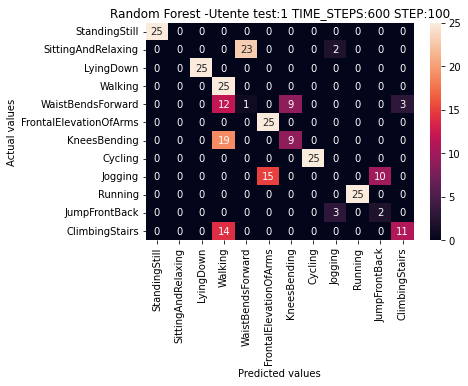

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.3s finished
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Us

                        precision    recall  f1-score   support

        ClimbingStairs       0.69      1.00      0.82        25
               Cycling       1.00      1.00      1.00        25
FrontalElevationOfArms       1.00      1.00      1.00        28
               Jogging       0.58      0.28      0.38        25
         JumpFrontBack       0.00      0.00      0.00         5
          KneesBending       1.00      0.93      0.96        29
             LyingDown       1.00      1.00      1.00        25
               Running       0.58      1.00      0.74        25
    SittingAndRelaxing       1.00      1.00      1.00        25
         StandingStill       1.00      1.00      1.00        25
     WaistBendsForward       0.00      0.00      0.00        26
               Walking       0.62      1.00      0.77        25

              accuracy                           0.82       288
             macro avg       0.71      0.77      0.72       288
          weighted avg       0.76     

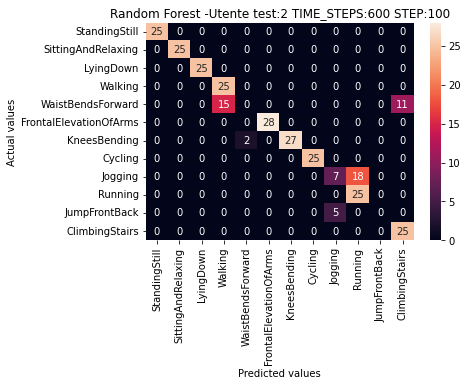

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.3s finished
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Us

                        precision    recall  f1-score   support

        ClimbingStairs       0.00      0.00      0.00        25
               Cycling       1.00      1.00      1.00        25
FrontalElevationOfArms       1.00      1.00      1.00        28
               Jogging       0.88      0.60      0.71        25
         JumpFrontBack       1.00      0.40      0.57         5
          KneesBending       0.37      1.00      0.54        26
             LyingDown       1.00      1.00      1.00        25
               Running       0.69      1.00      0.82        25
    SittingAndRelaxing       0.00      0.00      0.00        25
         StandingStill       0.50      1.00      0.67        25
     WaistBendsForward       1.00      0.15      0.26        27
               Walking       0.86      1.00      0.93        25

              accuracy                           0.70       286
             macro avg       0.69      0.68      0.62       286
          weighted avg       0.68     

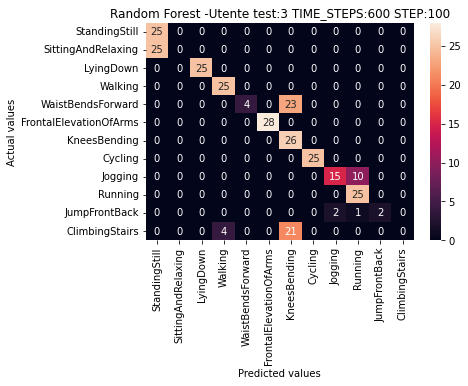

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.3s finished
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Us

                        precision    recall  f1-score   support

        ClimbingStairs       1.00      1.00      1.00        25
               Cycling       0.38      1.00      0.56        25
FrontalElevationOfArms       0.32      0.44      0.38        27
               Jogging       0.50      1.00      0.67        25
         JumpFrontBack       1.00      0.20      0.33         5
          KneesBending       0.21      0.62      0.31        26
             LyingDown       0.00      0.00      0.00        25
               Running       0.00      0.00      0.00        25
    SittingAndRelaxing       0.00      0.00      0.00        25
         StandingStill       0.00      0.00      0.00        25
     WaistBendsForward       1.00      0.11      0.19        28
               Walking       0.00      0.00      0.00        25

              accuracy                           0.37       286
             macro avg       0.37      0.36      0.29       286
          weighted avg       0.33     

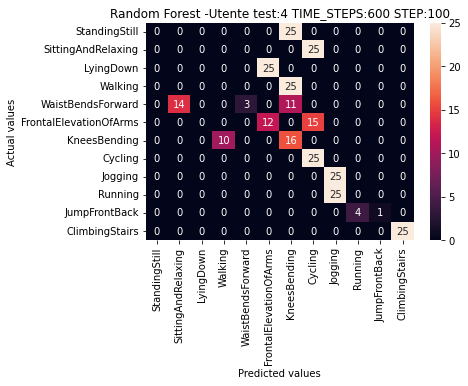

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.3s finished
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Us

                        precision    recall  f1-score   support

        ClimbingStairs       0.92      0.44      0.59        25
               Cycling       1.00      1.00      1.00        25
FrontalElevationOfArms       0.46      1.00      0.63        23
               Jogging       0.47      1.00      0.64        25
         JumpFrontBack       0.00      0.00      0.00         5
          KneesBending       0.59      1.00      0.75        22
             LyingDown       0.00      0.00      0.00        25
               Running       1.00      1.00      1.00        25
    SittingAndRelaxing       0.00      0.00      0.00        25
         StandingStill       1.00      1.00      1.00        25
     WaistBendsForward       0.96      1.00      0.98        22
               Walking       0.50      0.44      0.47        25

              accuracy                           0.69       272
             macro avg       0.57      0.66      0.59       272
          weighted avg       0.61     

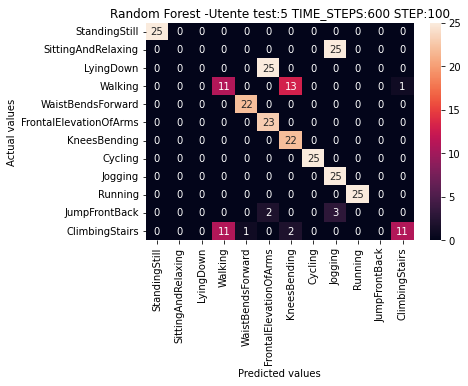

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.6min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.3s finished
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Us

                        precision    recall  f1-score   support

        ClimbingStairs       0.96      0.92      0.94        25
               Cycling       1.00      1.00      1.00        25
FrontalElevationOfArms       0.00      0.00      0.00        15
               Jogging       0.00      0.00      0.00        25
         JumpFrontBack       1.00      1.00      1.00         5
          KneesBending       1.00      1.00      1.00        18
             LyingDown       0.62      1.00      0.77        25
               Running       0.50      1.00      0.67        25
    SittingAndRelaxing       1.00      1.00      1.00        25
         StandingStill       1.00      1.00      1.00        25
     WaistBendsForward       0.00      0.00      0.00        17
               Walking       0.58      1.00      0.74        25

              accuracy                           0.77       255
             macro avg       0.64      0.74      0.68       255
          weighted avg       0.65     

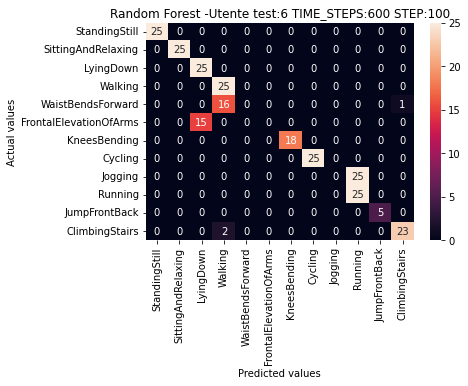

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.3s finished
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Us

                        precision    recall  f1-score   support

        ClimbingStairs       1.00      1.00      1.00        25
               Cycling       1.00      1.00      1.00        25
FrontalElevationOfArms       0.81      1.00      0.90        22
               Jogging       0.93      1.00      0.96        25
         JumpFrontBack       0.00      0.00      0.00         5
          KneesBending       0.00      0.00      0.00        23
             LyingDown       1.00      1.00      1.00        25
               Running       1.00      0.92      0.96        25
    SittingAndRelaxing       1.00      1.00      1.00        25
         StandingStill       1.00      1.00      1.00        25
     WaistBendsForward       0.00      0.00      0.00        25
               Walking       0.00      0.00      0.00        25

              accuracy                           0.71       275
             macro avg       0.65      0.66      0.65       275
          weighted avg       0.69     

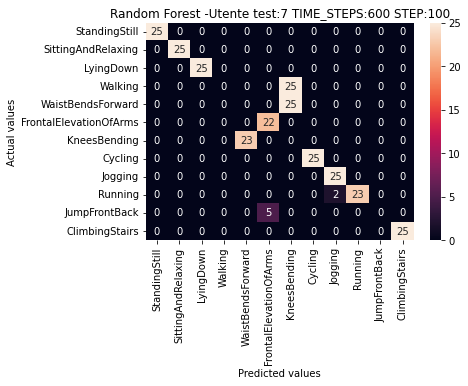

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.6min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.3s finished
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Us

                        precision    recall  f1-score   support

        ClimbingStairs       1.00      0.36      0.53        25
               Cycling       1.00      1.00      1.00        25
FrontalElevationOfArms       1.00      1.00      1.00        25
               Jogging       0.96      0.96      0.96        25
         JumpFrontBack       1.00      0.80      0.89         5
          KneesBending       0.35      1.00      0.52        20
             LyingDown       1.00      0.08      0.15        25
               Running       0.96      1.00      0.98        25
    SittingAndRelaxing       0.52      1.00      0.68        25
         StandingStill       1.00      1.00      1.00        25
     WaistBendsForward       0.80      1.00      0.89        16
               Walking       0.00      0.00      0.00        25

              accuracy                           0.75       266
             macro avg       0.80      0.77      0.72       266
          weighted avg       0.79     

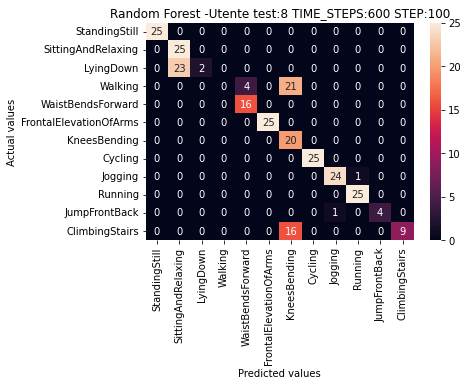

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.3s finished


                        precision    recall  f1-score   support

        ClimbingStairs       1.00      0.08      0.15        25
               Cycling       1.00      1.00      1.00        25
FrontalElevationOfArms       1.00      1.00      1.00        23
               Jogging       1.00      1.00      1.00        25
         JumpFrontBack       1.00      1.00      1.00         5
          KneesBending       0.69      1.00      0.81        24
             LyingDown       1.00      1.00      1.00        25
               Running       1.00      1.00      1.00        25
    SittingAndRelaxing       1.00      1.00      1.00        25
         StandingStill       1.00      1.00      1.00        25
     WaistBendsForward       1.00      0.52      0.69        23
               Walking       0.52      1.00      0.68        25

              accuracy                           0.88       275
             macro avg       0.93      0.88      0.86       275
          weighted avg       0.93     

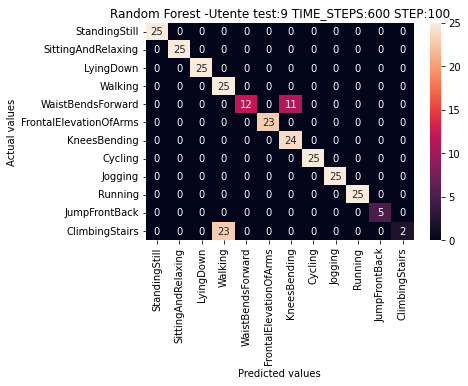

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.3s finished
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Us

                        precision    recall  f1-score   support

        ClimbingStairs       0.96      1.00      0.98        25
               Cycling       0.00      0.00      0.00        25
FrontalElevationOfArms       0.88      1.00      0.94        22
               Jogging       0.47      1.00      0.64        25
         JumpFrontBack       1.00      0.40      0.57         5
          KneesBending       1.00      1.00      1.00        23
             LyingDown       0.00      0.00      0.00        25
               Running       1.00      1.00      1.00        25
    SittingAndRelaxing       0.53      1.00      0.69        25
         StandingStill       1.00      1.00      1.00        25
     WaistBendsForward       1.00      1.00      1.00        19
               Walking       1.00      0.96      0.98        25

              accuracy                           0.80       269
             macro avg       0.74      0.78      0.73       269
          weighted avg       0.71     

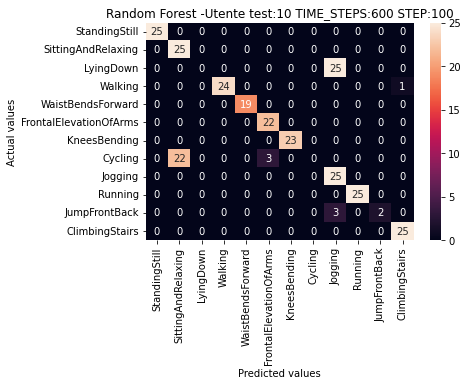

F1 total:  0.6556124655160387
Accuracy total:  0.7107721803023677
   Time Steps  Step  Average accuracy  Average F1
0         600   100          0.710772    0.655612


In [110]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

rf_results = []

gc.collect()
for config in itertools.product(time_steps_list, step_list):



    time_step = config[0]
    step=config[1]

    tuple = tuple_by_timestep[time_steps][step]

    f1_list = []
    acc_list = []

    for user_id in users_ids:

        x_test = tuple[user_id][0]
        y_test = tuple[user_id][1]

        x_train = []
        y_train = []

        for id in users_ids:
            if id != user_id:
                x_train+=tuple[id][0]
                y_train+=tuple[id][1]
        
        x_train = [x_train[i].flatten() for i in range(len(x_train)) ]
        x_test = [x_test[i].flatten() for i in range(len(x_test))]

        y_train = np.array(y_train).flatten()
        y_test = np.array(y_test).flatten()

        scaler = MinMaxScaler()
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.transform(x_test)

        model = RandomForestClassifier(n_jobs=-1,n_estimators=1000,random_state=seed, verbose=True)

        model.fit(x_train, y_train)

        y_pred = model.predict(x_test)

        conf_mat = confusion_matrix(y_test, y_pred, labels=classes)

        f1 = f1_score(y_test, y_pred, average='weighted')
        acc = accuracy_score(y_test, y_pred)

        print(classification_report(y_test, y_pred))

        ax = seaborn.heatmap(conf_mat, annot=True, fmt='d')

        ax.set_title("Random Forest -Utente test:" + str(user_id) + " TIME_STEPS:"+str(time_step)+" STEP:"+str(step))
        ax.get_figure().savefig(rf_dir+plot_dir+'/'+ax.get_title().replace(":"," ")+".png", dpi=500)
        ax.set_xlabel('Predicted values')
        ax.set_ylabel('Actual values')

        ax.xaxis.set_ticklabels(classes, rotation=90)
        ax.yaxis.set_ticklabels(classes, rotation=0)


        print("f1: ", f1)
        print("acc: ", acc)

        f1_list.append(f1)
        acc_list.append(acc)


        plt.show()
    
    print("F1 total: ", np.mean(f1_list))
    print("Accuracy total: ", np.mean(acc_list))

    rf_results.append({
    'Time Steps':time_step,
    'Step':step,
    'Average accuracy':np.mean(acc_list),
    'Average F1': np.mean(f1_list),
    })

rf_results_df = pd.DataFrame(rf_results)
rf_results_df.to_csv(rf_dir + result_filename)
print(rf_results_df)


## SVM

In [111]:
svm_dir = folder_name + "\\svm"
plot_dir = "\\plot"
result_filename = "\\result.csv"
config_filename = "\\config.txt"

try:
    mkdir(svm_dir )
    mkdir(svm_dir + plot_dir)
except OSError as error:
    print(error)

[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

        ClimbingStairs       0.33      0.32      0.33        25
               Cycling       1.00      1.00      1.00        25
FrontalElevationOfArms       1.00      1.00      1.00        25
               Jogging       0.74      1.00      0.85        25
         JumpFrontBack       1.00      0.40      0.57         5
          KneesBending       0.25      0.18      0.21        28
             LyingDown       1.00      1.00      1.00        25
               Running       1.00      0.76      0.86        25
    SittingAndRelaxing       0.00      0.00      0.00        25
         StandingStill       0.49      1.00      0.66        25
     WaistBendsForward       0.28      0.28      0.28        25
               Walking       0.73      0.96      0.83        25

              accuracy                           0.67       283
             macro avg       0.65      0.66      0.63       283
          weighted avg       0.62     

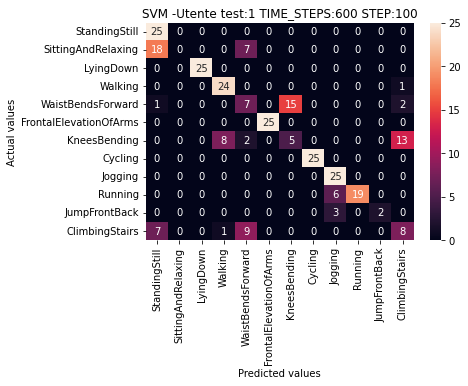

[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

        ClimbingStairs       0.68      1.00      0.81        25
               Cycling       1.00      1.00      1.00        25
FrontalElevationOfArms       1.00      1.00      1.00        28
               Jogging       0.53      0.32      0.40        25
         JumpFrontBack       0.00      0.00      0.00         5
          KneesBending       1.00      0.41      0.59        29
             LyingDown       1.00      1.00      1.00        25
               Running       0.57      0.92      0.71        25
    SittingAndRelaxing       0.96      1.00      0.98        25
         StandingStill       0.53      1.00      0.69        25
     WaistBendsForward       0.00      0.00      0.00        26
               Walking       0.83      0.96      0.89        25

              accuracy                           0.76       288
             macro avg       0.68      0.72      0.67       288
          weighted avg       0.73     

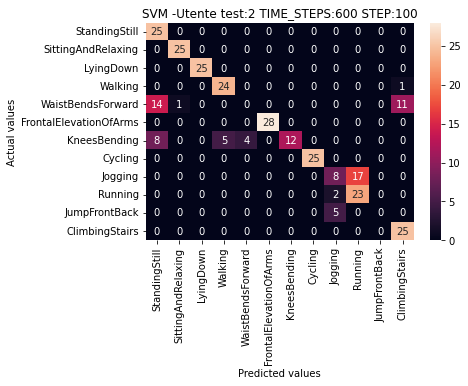

[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

        ClimbingStairs       0.00      0.00      0.00        25
               Cycling       1.00      1.00      1.00        25
FrontalElevationOfArms       1.00      1.00      1.00        28
               Jogging       1.00      0.96      0.98        25
         JumpFrontBack       0.00      0.00      0.00         5
          KneesBending       0.40      0.88      0.55        26
             LyingDown       1.00      1.00      1.00        25
               Running       0.81      1.00      0.89        25
    SittingAndRelaxing       0.00      0.00      0.00        25
         StandingStill       0.53      1.00      0.69        25
     WaistBendsForward       0.28      0.19      0.22        27
               Walking       0.83      1.00      0.91        25

              accuracy                           0.72       286
             macro avg       0.57      0.67      0.60       286
          weighted avg       0.61     

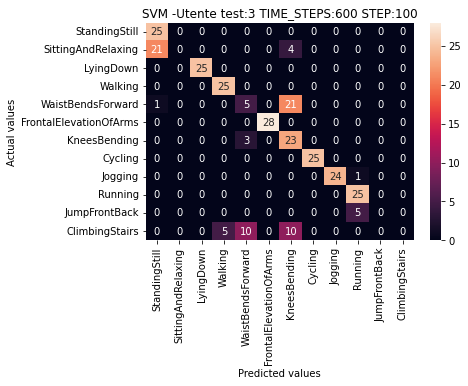

[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

        ClimbingStairs       1.00      0.12      0.21        25
               Cycling       0.50      1.00      0.67        25
FrontalElevationOfArms       1.00      1.00      1.00        27
               Jogging       0.46      0.88      0.60        25
         JumpFrontBack       0.00      0.00      0.00         5
          KneesBending       0.08      0.27      0.13        26
             LyingDown       0.00      0.00      0.00        25
               Running       0.25      0.04      0.07        25
    SittingAndRelaxing       0.00      0.00      0.00        25
         StandingStill       0.00      0.00      0.00        25
     WaistBendsForward       0.91      0.36      0.51        28
               Walking       0.00      0.00      0.00        25

              accuracy                           0.33       286
             macro avg       0.35      0.31      0.27       286
          weighted avg       0.38     

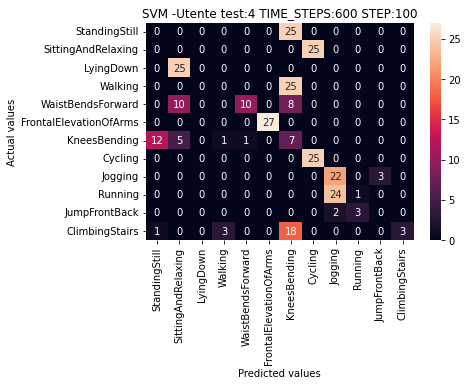

[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

        ClimbingStairs       0.42      0.32      0.36        25
               Cycling       1.00      1.00      1.00        25
FrontalElevationOfArms       1.00      1.00      1.00        23
               Jogging       0.85      0.92      0.88        25
         JumpFrontBack       1.00      0.20      0.33         5
          KneesBending       0.75      0.82      0.78        22
             LyingDown       1.00      1.00      1.00        25
               Running       0.93      1.00      0.96        25
    SittingAndRelaxing       0.00      0.00      0.00        25
         StandingStill       1.00      1.00      1.00        25
     WaistBendsForward       0.24      0.45      0.32        22
               Walking       0.71      1.00      0.83        25

              accuracy                           0.76       272
             macro avg       0.74      0.73      0.71       272
          weighted avg       0.73     

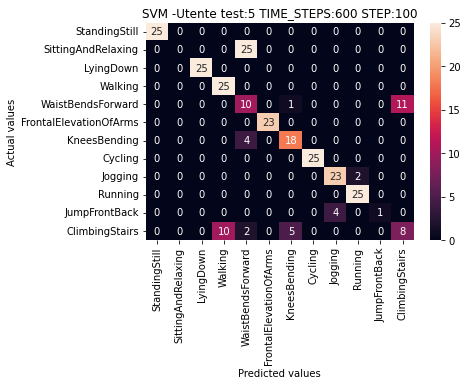

[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

        ClimbingStairs       0.41      0.36      0.38        25
               Cycling       1.00      1.00      1.00        25
FrontalElevationOfArms       0.00      0.00      0.00        15
               Jogging       0.00      0.00      0.00        25
         JumpFrontBack       1.00      0.80      0.89         5
          KneesBending       0.57      0.22      0.32        18
             LyingDown       0.62      1.00      0.77        25
               Running       0.50      1.00      0.67        25
    SittingAndRelaxing       1.00      1.00      1.00        25
         StandingStill       1.00      1.00      1.00        25
     WaistBendsForward       0.50      0.12      0.19        17
               Walking       0.48      1.00      0.65        25

              accuracy                           0.66       255
             macro avg       0.59      0.62      0.57       255
          weighted avg       0.58     

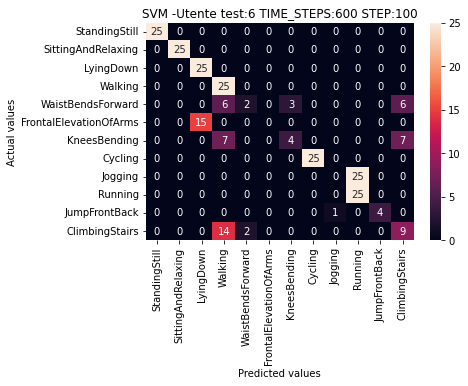

[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

        ClimbingStairs       0.96      0.88      0.92        25
               Cycling       1.00      1.00      1.00        25
FrontalElevationOfArms       0.42      1.00      0.59        22
               Jogging       0.49      0.88      0.63        25
         JumpFrontBack       0.00      0.00      0.00         5
          KneesBending       0.03      0.04      0.04        23
             LyingDown       0.00      0.00      0.00        25
               Running       1.00      0.04      0.08        25
    SittingAndRelaxing       0.74      1.00      0.85        25
         StandingStill       0.38      0.48      0.42        25
     WaistBendsForward       0.00      0.00      0.00        25
               Walking       1.00      0.28      0.44        25

              accuracy                           0.50       275
             macro avg       0.50      0.47      0.41       275
          weighted avg       0.54     

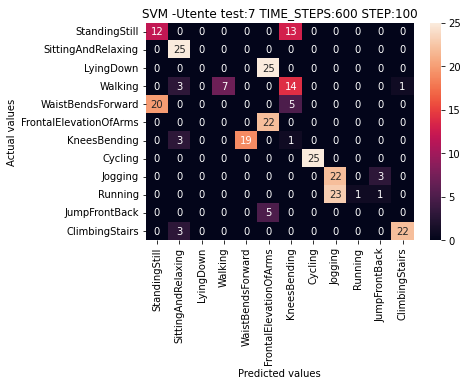

[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

        ClimbingStairs       0.56      0.36      0.44        25
               Cycling       1.00      0.52      0.68        25
FrontalElevationOfArms       1.00      1.00      1.00        25
               Jogging       0.89      0.96      0.92        25
         JumpFrontBack       1.00      0.40      0.57         5
          KneesBending       0.33      0.45      0.38        20
             LyingDown       0.00      0.00      0.00        25
               Running       0.88      0.92      0.90        25
    SittingAndRelaxing       0.40      1.00      0.57        25
         StandingStill       1.00      1.00      1.00        25
     WaistBendsForward       0.41      0.75      0.53        16
               Walking       0.79      0.44      0.56        25

              accuracy                           0.67       266
             macro avg       0.69      0.65      0.63       266
          weighted avg       0.68     

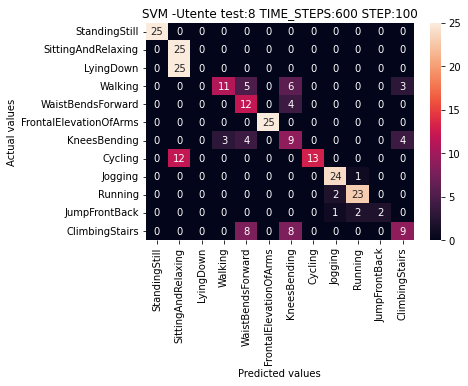

[LibSVM]                        precision    recall  f1-score   support

        ClimbingStairs       0.67      0.40      0.50        25
               Cycling       1.00      1.00      1.00        25
FrontalElevationOfArms       1.00      1.00      1.00        23
               Jogging       0.93      1.00      0.96        25
         JumpFrontBack       1.00      0.60      0.75         5
          KneesBending       0.39      0.50      0.44        24
             LyingDown       1.00      1.00      1.00        25
               Running       1.00      1.00      1.00        25
    SittingAndRelaxing       1.00      1.00      1.00        25
         StandingStill       1.00      1.00      1.00        25
     WaistBendsForward       0.58      0.78      0.67        23
               Walking       0.95      0.76      0.84        25

              accuracy                           0.85       275
             macro avg       0.88      0.84      0.85       275
          weighted avg       0

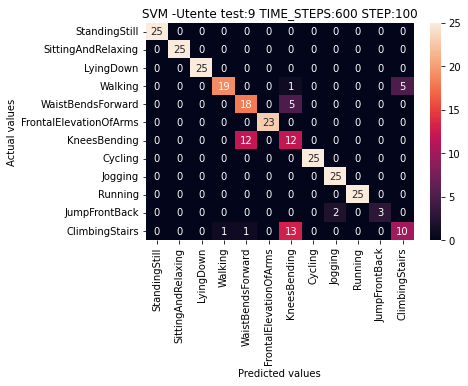

[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

        ClimbingStairs       0.64      1.00      0.78        25
               Cycling       1.00      0.96      0.98        25
FrontalElevationOfArms       1.00      1.00      1.00        22
               Jogging       0.89      1.00      0.94        25
         JumpFrontBack       1.00      0.20      0.33         5
          KneesBending       0.88      0.30      0.45        23
             LyingDown       1.00      1.00      1.00        25
               Running       0.96      1.00      0.98        25
    SittingAndRelaxing       0.96      1.00      0.98        25
         StandingStill       0.61      1.00      0.76        25
     WaistBendsForward       0.66      1.00      0.79        19
               Walking       0.00      0.00      0.00        25

              accuracy                           0.83       269
             macro avg       0.80      0.79      0.75       269
          weighted avg       0.79     

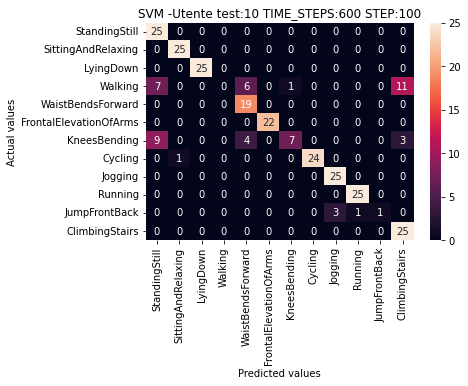

F1 weighted total:  0.6335863568652951
F1 macro total:  0.6093458134856243
Accuracy total:  0.6762565497690867
   Time Steps  Step  Average accuracy  Average F1 macro  Average F1 weighted
0         600   100          0.676257          0.609346             0.633586


In [112]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

svm_results = []

gc.collect()
for config in itertools.product(time_steps_list, step_list):

    time_step = config[0]
    step=config[1]

    tuple = tuple_by_timestep[time_steps][step]

    f1_macro_list = []
    f1_weighted_list = []
    acc_list = []

    for user_id in users_ids:

        x_test = tuple[user_id][0]
        y_test = tuple[user_id][1]

        x_train = []
        y_train = []

        for id in users_ids:
            if id != user_id:
                x_train+=tuple[id][0]
                y_train+=tuple[id][1]
        
        x_train = [x_train[i].flatten() for i in range(len(x_train)) ]
        x_test = [x_test[i].flatten() for i in range(len(x_test))]

        y_train = np.array(y_train).flatten()
        y_test = np.array(y_test).flatten()

        scaler = MinMaxScaler()
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.transform(x_test)

        #model = RandomForestClassifier(n_jobs=-1,n_estimators=1000,random_state=seed, verbose=True)
        model = SVC(kernel='linear',random_state=seed, verbose=1)

        model.fit(x_train, y_train)

        y_pred = model.predict(x_test)

        conf_mat = confusion_matrix(y_test, y_pred, labels=classes)

        f1_w = f1_score(y_test, y_pred, average='weighted')
        f1_m = f1_score(y_test, y_pred, average='macro')
        acc = accuracy_score(y_test, y_pred)

        print(classification_report(y_test, y_pred))

        ax = seaborn.heatmap(conf_mat, annot=True, fmt='d')

        ax.set_title("SVM -Utente test:" + str(user_id) + " TIME_STEPS:"+str(time_step)+" STEP:"+str(step))
        ax.get_figure().savefig(svm_dir + plot_dir +'/'+ax.get_title().replace(":"," ")+".png", dpi=500)
        ax.set_xlabel('Predicted values')
        ax.set_ylabel('Actual values')

        ax.xaxis.set_ticklabels(classes, rotation=90)
        ax.yaxis.set_ticklabels(classes, rotation=0)


        print("f1 macro: ", f1_m)
        print("f1 weighted: ", f1_w)
        print("acc: ", acc)

        f1_macro_list.append(f1_m)
        f1_weighted_list.append(f1_w)
        acc_list.append(acc)


        plt.show()
    
    print("F1 weighted total: ", np.mean(f1_weighted_list))
    print("F1 macro total: ", np.mean(f1_macro_list))
    print("Accuracy total: ", np.mean(acc_list))

    svm_results.append({
    'Time Steps':time_step,
    'Step':step,
    'Average accuracy':np.mean(acc_list),
    'Average F1 macro': np.mean(f1_macro_list),
    'Average F1 weighted': np.mean(f1_weighted_list)
    })

svm_results_df = pd.DataFrame(svm_results)
svm_results_df.to_csv(svm_dir + result_filename)
print(svm_results_df)



In [113]:
svm_results_df

,Time Steps,Step,Average accuracy,Average F1 macro,Average F1 weighted
0,600,100,0.676257,0.609346,0.633586


In [114]:
print("F1 weighted total: ", np.mean(f1_weighted_list))
print("F1 macro total: ", np.mean(f1_macro_list))
print("Accuracy total: ", np.mean(acc_list))

F1 weighted total:  0.6335863568652951
F1 macro total:  0.6093458134856243
Accuracy total:  0.6762565497690867
